# Projet 5 : Segmentez des clients d'un site e-commerce

# Partie 1 : Analyse exploratoire

Ce notebook d'analyse exploratoire est organisé de la manière suivante :

* [**1. Analyse pré-exploratoire**](#1.-Analyse-pré-exploratoire)
  * [**1.1 Import des jeux de données**](#1.1-Import-des-jeux-de-données)
  * [**1.2 La jointure des jeux de données**](#1.2-La-jointure-des-jeux-de-données)
  * [**1.3 Nettoyage du jeu de données final**](#1.3-Nettoyage-du-jeu-de-données-final)
    * [**1.3.1 Gestion des doublons**](#1.3.1-Gestion-des-doublons)
    * [**1.3.2 Gestion des outliers**](#1.3.2-Gestion-des-outliers)
  * [**1.4 Création de nouvelles variables pertinentes**](#1.4-Création-de-nouvelles-variables-pertinentes)
  * [**1.5 Création des jeux de données pour les essais des modèles et pour la simulation de la stabilité**](#1.5-Création-des-jeux-de-données-pour-les-essais-des-modèles-et-pour-la-simulation-de-la-stabilité)
  * [**1.6 Gestion des valeurs manquantes**](#1.6-Gestion-des-valeurs-manquantes)
* [**2. Analyse exploratoire**](#2.-Analyse-exploratoire)
  * [**2.1 Feature engineering et exploration du jeu de données**](#2.1-Feature-engineering-et-exploration-du-jeu-de-données)
  * [**2.2 Sélection des variables pertinentes**](#2.2-Sélection-des-variables-pertinentes)
  * [**2.3 Analyse univariée**](#2.3-Analyse-univariée)
    * [**2.3.1 Mise en place des indicateurs statistiques classiques**](#2.3.1-Mise-en-place-des-indicateurs-statistiques-classiques)
    * [**2.3.2 Distributions des variables**](#2.3.2-Distributions-des-variables)
       * [**2.3.2.1 Les boxplots**](#2.3.2.1-Les-boxplots)
       * [**2.3.2.2 Les histogrammes**](#2.3.2.2-Les-histogrammes)
    * [**2.3.3 Test d'adéquation des variables à une loi normale et test d'égalité des variances**](#2.3.3-Test-d'adéquation-des-variables-à-une-loi-normale-et-test-d'égalité-des-variances)
  * [**2.4 Analyse multivariée**](#2.4-Analyse-multivariée)
    * [**2.4.1 La matrice des corrélations**](#2.4.1-La-matrice-des-corrélations)
    * [**2.4.2 Les diagrammes de dispersion**](#2.4.2-Les-diagrammes-de-dispersion)
    * [**2.4.3 Analyse bivariée entre les variables quantitatives et les variables catégorielles**](#2.4.3-Analyse-bivariée-entre-les-variables-quantitatives-et-les-variables-catégorielles)
    * [**2.4.4 Analyse de la variance ou ANOVA et calcul du rapport de corrélation ou η²**](#2.4.4-Analyse-de-la-variance-ou-ANOVA-et-calcul-du-rapport-de-corrélation-ou-η²)
* [**3. Analyse en composantes principales ou ACP**](#3.-Analyse-en-composantes-principales-ou-ACP)
* [**4. Export des jeux de données**](#4.-Export-des-jeux-de-données)

# 1. Analyse pré-exploratoire

In [1]:
# Project 5: Segment customers of an e-commerce site
# Part 1: Analysis
# 1. Preprocessing
# Import libraries
import warnings
import datetime
import seaborn as sns
%pylab inline
import pandas as pd

# Statistical package
import pingouin as pg


# Sickit-Learn library
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn import decomposition

from matplotlib.collections import LineCollection

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 1.1 Import des jeux de données

In [2]:
# 1.1 Loading datasets
def display_dataset_info(data):
    """This function displays dataset information."""
    # Dimensions of the dataset
    print("Dimensions of the dataset: {}".format(data.shape))

    # Information about the dataset
    print("\nInformation about the dataset: ")
    print(data.info())

    # Percentage of dataset completion
    data_completion = data.count() / len(data) * 100
    data_completion_rate = round(data_completion.mean(), 0)
    print("\nData completion rate: {}".format(data_completion_rate))

    # Missing data rate
    data_dna = data.isna().mean() * 100
    data_dna_rate = round(data_dna.mean(), 0)
    print("Missing data rate: {}".format(data_dna_rate))


def display_data_completion_rate(data):
    """This function displays the dataset completion rate."""
    # Dataset completion rate
    data_completion = data.count() / len(data) * 100
    print(round(data_completion, 2))
    data_completion_rate = data_completion.astype(int)
    dataviz = data_completion_rate.sort_values(ascending=False)

    # Setup the figure
    ax = dataviz.plot(kind='bar', figsize=(10, 7))
    for value in ax.patches:
        ax.annotate(
            value.get_height(),
            (value.get_x() + value.get_width() / 2,
             value.get_height()),
            ha='center',
            va='bottom')
    fig = ax.get_figure()
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha='right')
    ax.set_title('Data completion rate')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Percentage of data completion (%)')
    plt.show()

Chargement du jeu de données "customers_data_dataset" :

Dimensions of the dataset: (99441, 5)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
customer_id                 100.0
customer_unique_id          100.0
customer_zip_code_prefix    100.0
customer_city               100.0
customer_state              100.0
dtype: float64


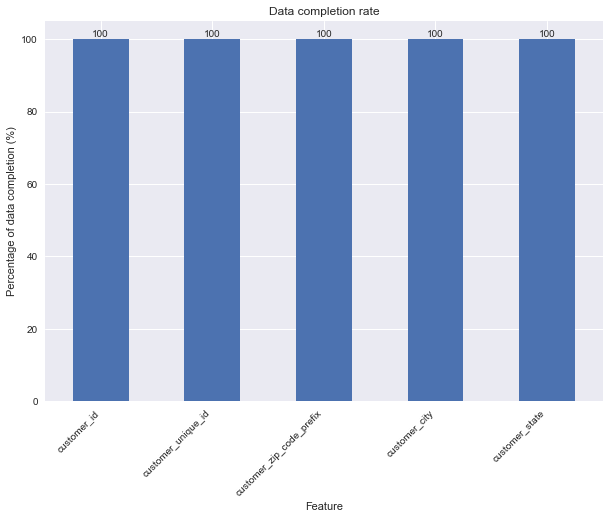

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# Loading olist_customers dataset
customers = pd.read_csv('olist_customers_dataset.csv',
                        sep=',')

# Displaying dataset information
display_dataset_info(customers)

# Displaying the dataset completion rate
display_data_completion_rate(customers)
customers.head()

Chargement du jeu de données "olist_orders_dataset" :

Dimensions of the dataset: (99441, 8)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Data completion rate: 99.0
Missing data rate: 1.0
order_id                         100.00
customer_id                      100.00
order_status                     100.00
order_purchase_

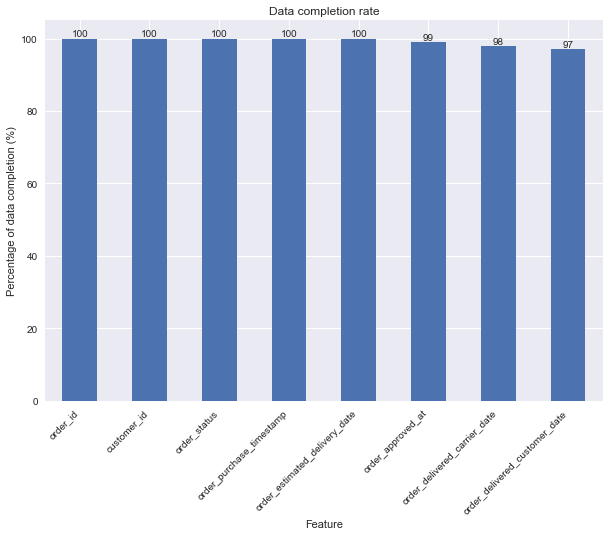

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Loading olist_orders dataset
orders = pd.read_csv('olist_orders_dataset.csv',
                     sep=',')

# Displaying dataset information
display_dataset_info(orders)

# Displaying the dataset completion rate
display_data_completion_rate(orders)
orders.head()

Chargement du jeu de données "olist_order_items_dataset" :

Dimensions of the dataset: (112650, 7)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
order_id               100.0
order_item_id          100.0
product_id             100.0
seller_id              100.0
shipping_limit_date    100.0
price                  100.0
freight_value          100.0
dtype: float64


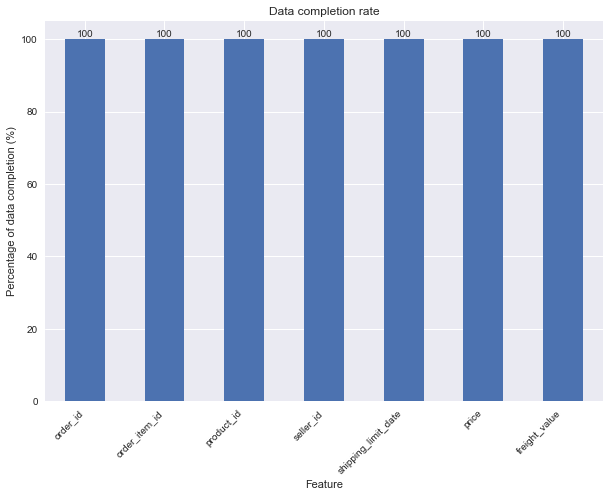

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Loading olist_order_items dataset
order_items = pd.read_csv('olist_order_items_dataset.csv',
                          sep=',')

# Displaying dataset information
display_dataset_info(order_items)

# Displaying the dataset completion rate
display_data_completion_rate(order_items)
order_items.head()

Chargement du jeu de données "olist_order_payments_dataset" :

Dimensions of the dataset: (103886, 5)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
order_id                100.0
payment_sequential      100.0
payment_type            100.0
payment_installments    100.0
payment_value           100.0
dtype: float64


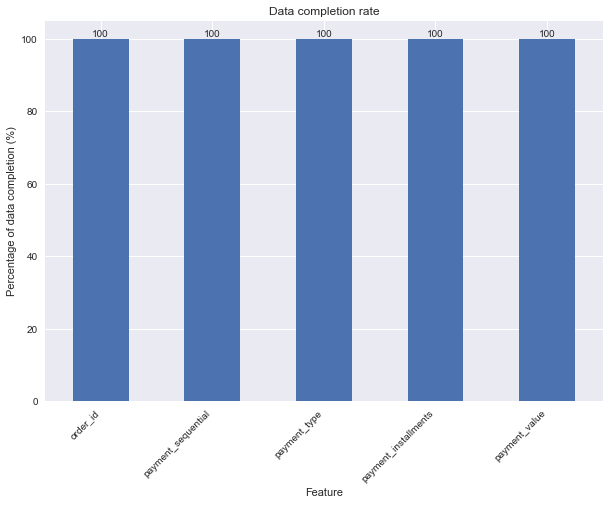

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
# Loading olist_order_payments dataset
order_payments = pd.read_csv('olist_order_payments_dataset.csv',
                             sep=',')

# Displaying dataset information
display_dataset_info(order_payments)

# Displaying the dataset completion rate
display_data_completion_rate(order_payments)
order_payments.head()

Chargement du jeu de données "olist_order_reviews_dataset" :

Dimensions of the dataset: (99224, 7)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Data completion rate: 79.0
Missing data rate: 21.0
review_id                  100.00
order_id                   100.00
review_score               100.00
review_comment_title        11.66
review_comment_message      41.30
review_creation_date       100.00
review_answer_timestamp    100.00

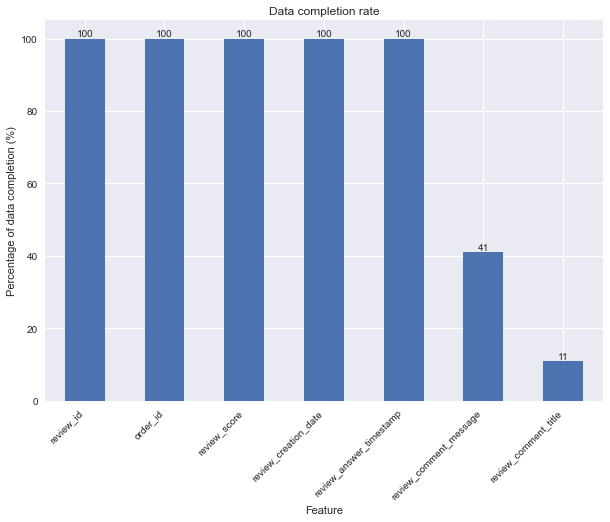

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
# Loading olist_order_reviews dataset
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv',
                            sep=',')

# Displaying dataset information
display_dataset_info(order_reviews)

# Displaying the dataset completion rate
display_data_completion_rate(order_reviews)
order_reviews.head()

Chargement du jeu de données "olist_products_dataset" :

Dimensions of the dataset: (32951, 9)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Data completion rate: 99.0
Missing data rate: 1.0
product_id                    100.00
product_category_name          98.15
product_name

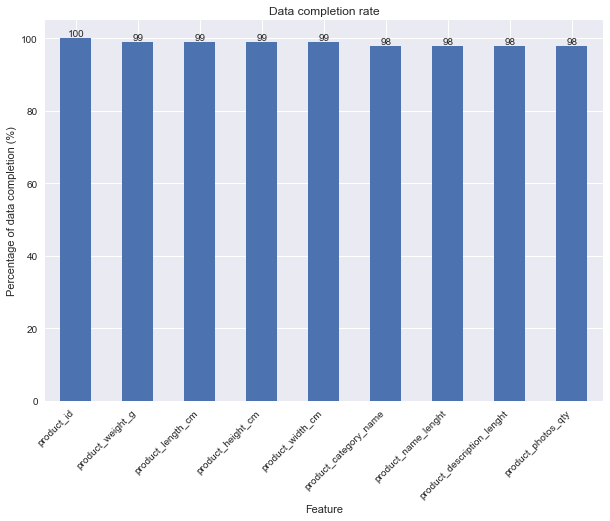

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
# Loading olist_products dataset
products = pd.read_csv('olist_products_dataset.csv',
                       sep=',')

# Displaying dataset information
display_dataset_info(products)

# Displaying the dataset completion rate
display_data_completion_rate(products)
products.head()

Chargement du jeu de données "olist_sellers_dataset" :

Dimensions of the dataset: (3095, 4)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

Data completion rate: 100.0
Missing data rate: 0.0
seller_id                 100.0
seller_zip_code_prefix    100.0
seller_city               100.0
seller_state              100.0
dtype: float64


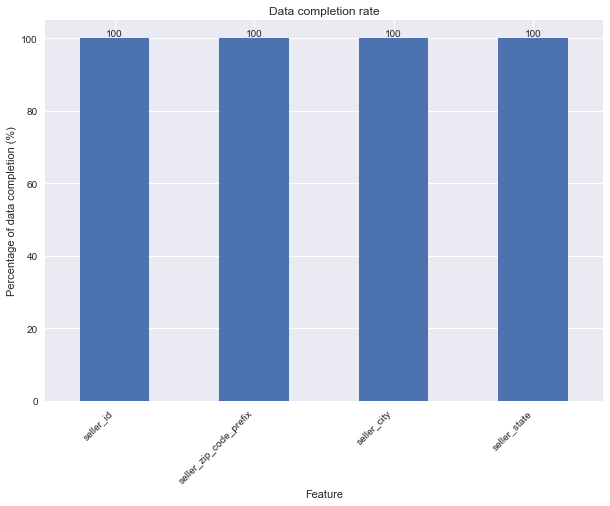

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
# Loading olist_sellers dataset
sellers = pd.read_csv('olist_sellers_dataset.csv',
                      sep=',')

# Displaying dataset information
display_dataset_info(sellers)

# Displaying the dataset completion rate
display_data_completion_rate(sellers)
sellers.head()

Chargement du jeu de données "product_category_name_translation" :

Dimensions of the dataset: (71, 2)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Data completion rate: 100.0
Missing data rate: 0.0
product_category_name            100.0
product_category_name_english    100.0
dtype: float64


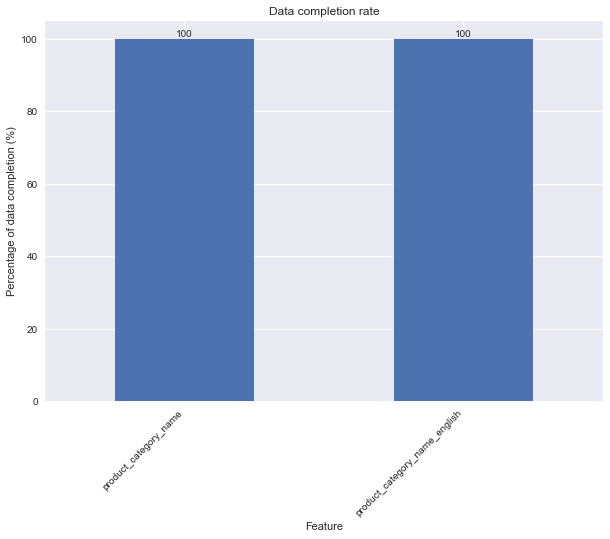

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [10]:
# Loading product_category_name_translation dataset
product_name = pd.read_csv('product_category_name_translation.csv',
                           sep=',')

# Displaying dataset information
display_dataset_info(product_name)

# Displaying the dataset completion rate
display_data_completion_rate(product_name)
product_name.head()

Chargement du jeu de données "olist_geolocation_dataset" :

Dimensions of the dataset: (1000163, 5)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
geolocation_zip_code_prefix    100.0
geolocation_lat                100.0
geolocation_lng                100.0
geolocation_city               100.0
geolocation_state              100.0
dtype: float64


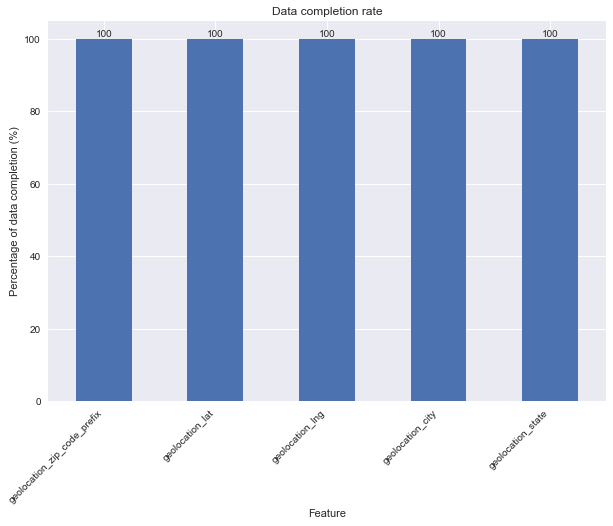

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [11]:
# Loading olist_geolocation dataset
geolocation = pd.read_csv('olist_geolocation_dataset.csv',
                          sep=',')

# Displaying dataset information
display_dataset_info(geolocation)

# Displaying the dataset completion rate
display_data_completion_rate(geolocation)
geolocation.head()

## 1.2 La jointure des jeux de données

In [12]:
# 1.2 Merging datasets
products_data_df = pd.merge(
    products,
    product_name,
    on='product_category_name',
    how='outer')
order_items_sellers_df = pd.merge(
    order_items,
    sellers,
    on='seller_id',
    how='outer')
order_items_sellers_payments_df = pd.merge(
    order_items_sellers_df,
    order_payments,
    on='order_id',
    how='outer')
order_items_df = pd.merge(
    order_items_sellers_payments_df,
    products_data_df,
    on='product_id',
    how='outer')
order_items_reviews_df = pd.merge(
    order_items_df,
    order_reviews,
    on='order_id',
    how='outer')
customers_orders_df = pd.merge(
    customers,
    orders,
    on='customer_id',
    how='outer')

data = pd.merge(
    order_items_reviews_df,
    customers_orders_df,
    on='order_id',
    how='outer')

# Displaying dataset information
display_dataset_info(data)
data.head(10)

Dimensions of the dataset: (119143, 40)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   seller_zip_code_prefix         118310 non-null  float64
 8   seller_city                    118310 non-null  object 
 9   seller_state                   118310 non-null  object 
 10  payment_sequential             119140 non-null  float64
 11  payment_type      

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277.0,volta redonda,SP,...,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,27277.0,volta redonda,SP,...,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,27277.0,volta redonda,SP,...,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,27277.0,volta redonda,SP,...,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,27277.0,volta redonda,SP,...,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00
5,a0f9acf0b6294ed8561e32cde1a966bc,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-03 15:23:46,55.9,26.93,27277.0,volta redonda,SP,...,33449409b16400dbeaf886a5140bf59c,44560,dom macedo costa,BA,delivered,2017-07-27 15:11:51,2017-07-28 15:23:46,2017-08-02 18:32:34,2017-08-31 20:19:52,2017-08-24 00:00:00
6,bbf796534aaf9c59f8da8c7982db56e0,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-03-26 03:28:44,64.9,38.50,27277.0,volta redonda,SP,...,31b9765a88ef50ccd457bb40491c4fbf,45160,belo campo,BA,delivered,2018-03-18 21:00:44,2018-03-20 03:28:44,2018-03-20 18:08:45,2018-03-28 21:57:44,2018-04-12 00:00:00
7,c9ef97d2854afe64a3b4488bc2836af6,2.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.9,18.12,27277.0,volta redonda,SP,...,840f10bde3c94907105e032d9c2fec3b,75903,rio verde,GO,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00
8,c9ef97d2854afe64a3b4488bc2836af6,1.0,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.9,17.83,27277.0,volta redonda,SP,...,840f10bde3c94907105e032d9c2fec3b,75903,rio verde,GO,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00
9,df2d910b8b5e5f461f67043489f9569d,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71,27277.0,volta redonda,SP,...,0efd4833752113fedce2e7250d49d5ac,53403,paulista,PE,delivered,2017-06-05 12:22:19,2017-06-05 14:31:21,2017-06-07 13:09:07,2017-06-26 13:52:03,2017-07-06 00:00:00


order_id                         100.00
order_item_id                     99.30
product_id                        99.30
seller_id                         99.30
shipping_limit_date               99.30
price                             99.30
freight_value                     99.30
seller_zip_code_prefix            99.30
seller_city                       99.30
seller_state                      99.30
payment_sequential               100.00
payment_type                     100.00
payment_installments             100.00
payment_value                    100.00
product_category_name             97.87
product_name_lenght               97.87
product_description_lenght        97.87
product_photos_qty                97.87
product_weight_g                  99.28
product_length_cm                 99.28
product_height_cm                 99.28
product_width_cm                  99.28
product_category_name_english     97.85
review_id                         99.16
review_score                      99.16


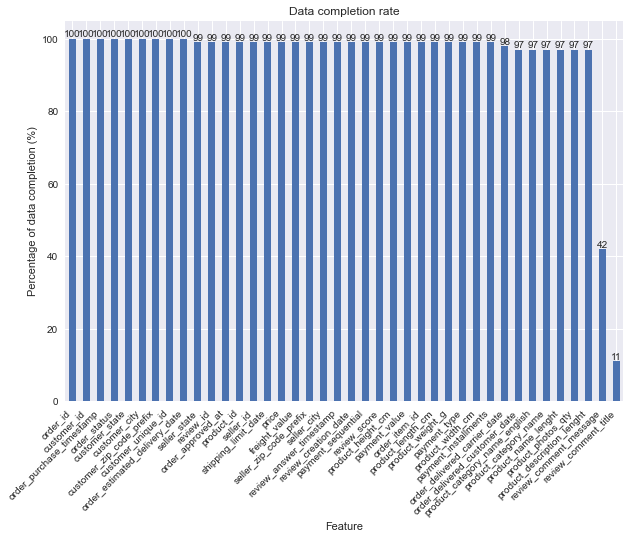

In [13]:
# Displaying the dataset completion rate
display_data_completion_rate(data)

## 1.3 Nettoyage du jeu de données final

### 1.3.1 Gestion des doublons

In [14]:
# 1.3 Cleaning the final dataset
# 1.3.1 Management of duplicate data
data[data.duplicated(subset=[
    'customer_unique_id',
    'price',
    'order_purchase_timestamp',
    'customer_city',
    'customer_state'])]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
8,c9ef97d2854afe64a3b4488bc2836af6,1.0,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.9,17.83,27277.0,volta redonda,SP,...,840f10bde3c94907105e032d9c2fec3b,75903,rio verde,GO,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00
10,df2d910b8b5e5f461f67043489f9569d,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71,27277.0,volta redonda,SP,...,0efd4833752113fedce2e7250d49d5ac,53403,paulista,PE,delivered,2017-06-05 12:22:19,2017-06-05 14:31:21,2017-06-07 13:09:07,2017-06-26 13:52:03,2017-07-06 00:00:00
11,df2d910b8b5e5f461f67043489f9569d,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.9,35.71,27277.0,volta redonda,SP,...,0efd4833752113fedce2e7250d49d5ac,53403,paulista,PE,delivered,2017-06-05 12:22:19,2017-06-05 14:31:21,2017-06-07 13:09:07,2017-06-26 13:52:03,2017-07-06 00:00:00
14,d829ae9ca5e0a9749f2574b62eb7ac10,2.0,7f1a77bec0639e473392e91a504272a5,48436dade18ac8b2bce089ec2a041202,2017-07-19 02:56:03,55.9,27.72,27277.0,volta redonda,SP,...,575083d1c98ec2938a00cd179a40f3d2,45810,porto seguro,BA,delivered,2017-07-12 12:04:28,2017-07-13 02:56:03,2017-07-14 16:23:42,2017-08-07 17:27:41,2017-08-09 00:00:00
28,e01371016351ae4493ecbd7a8c5a33f5,1.0,ec02a5d380128f7a188e9ce8f3ddd832,8444e55c1f13cd5c179851e5ca5ebd00,2018-01-16 10:18:26,131.9,18.54,37584.0,congonhal,MG,...,61ad224fa8a753d3edc80c7703c8e0b6,8330,sao paulo,SP,delivered,2017-12-26 15:29:42,2017-12-28 10:18:26,2018-01-09 19:03:01,2018-01-17 13:51:48,2018-02-19 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118853,4b460251c3d2ba44dd61b0b6c3410ac6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3d7bc770cfdbe423eb80de6893a8e05e,30112,belo horizonte,MG,unavailable,2017-03-27 17:19:37,2017-03-28 17:25:24,NaN,NaN,2017-04-26 00:00:00
118988,33d8795f04dd631f3480d7aaf90da3dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9eb7d30b5661dd9e5e2333954d84e02a,18860,timburi,SP,unavailable,2017-07-07 21:17:36,2017-07-07 21:30:13,NaN,NaN,2017-07-27 00:00:00
118997,ceb533871105f7cda81fafc19e1ee38e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8cda74bcb48b709a90e5441e19b1d759,13160,artur nogueira,SP,unavailable,2017-10-20 07:33:11,2017-10-21 03:07:36,NaN,NaN,2017-11-10 00:00:00
119097,02e723e8edb4a123d414f56cc9c4665e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,abfe742e782fb10f5c824fcb849e5cd1,18071,sorocaba,SP,canceled,2017-08-18 14:30:19,NaN,NaN,NaN,2017-09-21 00:00:00


In [15]:
data = data.drop_duplicates(subset=[
    'customer_unique_id',
    'price',
    'order_purchase_timestamp',
    'customer_city',
    'customer_state'])
data.reset_index(inplace=True, drop=True)
data.shape

(101996, 40)

### 1.3.2 Gestion des outliers

In [16]:
# 1.3.2 Management of outliers
# Maximum values
data.max()

order_id                         fffe41c64501cc87c801fd61db3f6244
order_item_id                                                21.0
price                                                      6735.0
freight_value                                              409.68
seller_zip_code_prefix                                    99730.0
payment_sequential                                           27.0
payment_installments                                         24.0
payment_value                                            13664.08
product_name_lenght                                          76.0
product_description_lenght                                 3992.0
product_photos_qty                                           20.0
product_weight_g                                          40425.0
product_length_cm                                           105.0
product_height_cm                                           105.0
product_width_cm                                            118.0
review_sco

In [17]:
# Minimum values
data.min()

order_id                         00010242fe8c5a6d1ba2dd792cb16214
order_item_id                                                 1.0
price                                                        0.85
freight_value                                                 0.0
seller_zip_code_prefix                                     1001.0
payment_sequential                                            1.0
payment_installments                                          0.0
payment_value                                                 0.0
product_name_lenght                                           5.0
product_description_lenght                                    4.0
product_photos_qty                                            1.0
product_weight_g                                              0.0
product_length_cm                                             7.0
product_height_cm                                             2.0
product_width_cm                                              6.0
review_sco

## 1.4 Création de nouvelles variables pertinentes

In [18]:
# 1.4 Creating additional relevant features
# Management of datetime features
datetime_features = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date']

for feature in datetime_features:
    data[feature] = pd.to_datetime(data[feature])

data['day'] = data['order_purchase_timestamp'].dt.day
data['month'] = data['order_purchase_timestamp'].dt.month
data['year'] = data['order_purchase_timestamp'].dt.year
data = data.sort_values(by=["year", "month", "day"], ascending=False)
data.reset_index(inplace=True, drop=True)

# How many days ago was the customer last purchase
last_date = datetime.date(2018, 10, 17)
date = data['order_purchase_timestamp'].dt.date
recency = last_date - date
data['recency'] = recency.dt.days
print(data.shape)
data.head()

(101996, 44)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day,month,year,recency
0,10a045cdf6a5650c21e9cfeb60384c16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,17,10,2018,0
1,b059ee4de278302d550a3035c4cdb740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,16,10,2018,1
2,a2ac6dad85cf8af5b0afb510a240fe8c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,3,10,2018,14
3,616fa7d4871b87832197b2a137a115d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,1,10,2018,16
4,392ed9afd714e3c74767d0c4d3e3f477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,29,9,2018,18


## 1.5 Création des jeux de données pour les essais des modèles et pour la simulation de la stabilité

Nous allons créer deux jeux de données suivantes :
- customers_df : le jeu de données comportant l'ensemble des clients et leurs caractéristiques pour les essais des différentes approches de modélisation ;
- stability_df : le jeu de données comportant des clients sélectionnés sur une période de 1 an (du 18/10/2017 au 17/10/2018) pour la simulation permettant de déterminer la fréquence nécessaire de mise à jour du modèle de segmentation.



La méthode de segmentation RFM en marketing ou méthode de la qualité d'un client en marketing permet d'effectuer un classement des clients en fonction de leurs habitudes d'achat. Le classement se fait en fonction de 3 critères :
- Récence : date du dernier achat ;
- Fréquence : fréquence des achats sur une période de référence ;
- Montant : somme des achats cumulés sur cette période.

Afin de prendre en compte dans notre analyse la méthode RFM, nous allons créer des variables correspondant à la date du dernier achat d'un client et ses habitudes d'achat.



Nous allons également ajouter six autres variables au jeu de données :
- monetary : le montant de la transaction de chaque client ;
- r_score : le score pour la récence de chaque client ;
- f_score : le score pour la fréquence des achats de chaque client ;
- m_score : le score pour le montant des achats de chaque client;
- rfm_score : le score rfm pour chaque client ;
- score : le score global qui est la moyenne des r_score, f_score, m_score et review_score.

L'objectif de la variable "score" est d'avoir un score moyen permettant de segmenter et de différencier les clients en matière de commandes et de satisfaction.

In [19]:
# 1.5 Creation of datasets for model testing and stability simulation
def score(x, feature, ascending):
    """This function calculates rency, frequency,
    and monetary scores by using quintile method.
    """
    if ascending is True:
        if x <= quintiles[feature][.2]:
            return 5
        elif x <= quintiles[feature][.4]:
            return 4
        elif x <= quintiles[feature][.6]:
            return 3
        elif x <= quintiles[feature][.8]:
            return 2
        else:
            return 1
    else:
        if x <= quintiles[feature][.2]:
            return 1
        elif x <= quintiles[feature][.4]:
            return 2
        elif x <= quintiles[feature][.6]:
            return 3
        elif x <= quintiles[feature][.8]:
            return 4
        else:
            return 5

### 1.5.1 Création du jeu de données pour les essais des différentes approches de modélisation

In [20]:
# 1.5.1 Creation of the dataset for testing the different modeling approaches
df = data[['customer_unique_id',
           'recency',
           'day',
           'month',
           'year',
           'order_purchase_timestamp',
           'customer_city',
           'customer_state']]
df = df.drop_duplicates(subset=
                ['customer_unique_id'],
                keep='first')
df.reset_index(inplace=True, drop=True)

rfm_df = data.groupby('customer_unique_id').agg(
    frequency=('order_id','count'),
    price=('price','sum'),
    payment_value=('payment_value','sum'),
    freight_value=('freight_value','sum'),
    review_score=('review_score','mean'))

customers_df1 = pd.merge(
    rfm_df,
    df,
    on='customer_unique_id',
    how='outer')

customers_df1 = customers_df1.sort_values(
    by=['frequency'],
    ascending=False)
customers_df1.reset_index(inplace=True, drop=True)
print(customers_df1.shape)
customers_df1.head(10)

(96096, 13)


,customer_unique_id,frequency,price,payment_value,freight_value,review_score,recency,day,month,year,order_purchase_timestamp,customer_city,customer_state
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,729.62,927.63,172.42,4.764706,58,20,8,2018,2018-08-20 19:14:26,sao paulo,SP
1,3e43e6105506432c953e165fb2acf44c,10,897.15,1536.84,138.78,2.800000,232,27,2,2018,2018-02-27 18:36:39,praia grande,SP
2,6469f99c1f9dfae7733b25662e7f1782,8,639.30,905.11,85.54,5.000000,111,28,6,2018,2018-06-28 00:43:34,santos,SP
3,ca77025e7201e3b30c44b472ff346268,8,723.65,1336.40,186.09,5.000000,138,1,6,2018,2018-06-01 11:38:29,recife,PE
4,1b6c7548a2a1f9037c1fd3ddfed95f33,8,691.21,1085.99,134.22,5.000000,245,14,2,2018,2018-02-14 13:22:12,ituiutaba,MG
5,c8ed31310fc440a3f8031b177f9842c3,7,827.40,8100.96,11.48,3.000000,66,12,8,2018,2018-08-12 02:11:20,ipua,SP
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,7,836.60,1086.78,107.61,4.857143,266,24,1,2018,2018-01-24 15:15:26,jandira,SP
7,d97b3cfb22b0d6b25ac9ed4e9c2d481b,7,473.99,5313.88,79.69,1.000000,365,17,10,2017,2017-10-17 13:06:29,sao paulo,SP
8,dc813062e0fc23409cd255f7f53c7074,6,427.76,1094.63,192.07,4.500000,55,23,8,2018,2018-08-23 00:07:26,garanhuns,PE
9,acea6bd29b8c1e3c6a8b266a8fb4475e,6,449.58,1146.76,129.40,2.833333,166,4,5,2018,2018-05-04 09:09:50,porto velho,RO


In [21]:
# Creating additional features
# Monetary
customers_df1['monetary'] = customers_df1['payment_value']

# R score, F score and M score
quintiles = customers_df1[
    ['recency',
     'frequency',
     'monetary']].quantile([.2, .4, .6, .8]).to_dict()

customers_df1['r_score'] = customers_df1['recency'].apply(lambda x: score(
    x, 'recency', True))
customers_df1['f_score'] = customers_df1['frequency'].apply(lambda x: score(
    x, 'frequency', False))
customers_df1['m_score'] = customers_df1['monetary'].apply(lambda x: score(
    x, 'monetary', False))

# RFM score
r_score = customers_df1['r_score'].map(str)
f_score = customers_df1['f_score'].map(str)
m_score = customers_df1['m_score'].map(str)
customers_df1['rfm_score'] = r_score + f_score + m_score
customers_df1['rfm_score'] = customers_df1['rfm_score'].astype('int64')

# Average score calculation
r_sore = customers_df1['r_score']
f_score = customers_df1['f_score']
m_score = customers_df1['m_score']
review_score = customers_df1['review_score']
customers_df1['score'] = (r_sore + f_score + m_score + review_score) / 4
print(customers_df1.shape)
customers_df1.head(10)

(96096, 19)


,customer_unique_id,frequency,price,payment_value,freight_value,review_score,recency,day,month,year,order_purchase_timestamp,customer_city,customer_state,monetary,r_score,f_score,m_score,rfm_score,score
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,729.62,927.63,172.42,4.764706,58,20,8,2018,2018-08-20 19:14:26,sao paulo,SP,927.63,5,5,5,555,4.941176
1,3e43e6105506432c953e165fb2acf44c,10,897.15,1536.84,138.78,2.800000,232,27,2,2018,2018-02-27 18:36:39,praia grande,SP,1536.84,3,5,5,355,3.950000
2,6469f99c1f9dfae7733b25662e7f1782,8,639.30,905.11,85.54,5.000000,111,28,6,2018,2018-06-28 00:43:34,santos,SP,905.11,5,5,5,555,5.000000
3,ca77025e7201e3b30c44b472ff346268,8,723.65,1336.40,186.09,5.000000,138,1,6,2018,2018-06-01 11:38:29,recife,PE,1336.40,5,5,5,555,5.000000
4,1b6c7548a2a1f9037c1fd3ddfed95f33,8,691.21,1085.99,134.22,5.000000,245,14,2,2018,2018-02-14 13:22:12,ituiutaba,MG,1085.99,3,5,5,355,4.500000
5,c8ed31310fc440a3f8031b177f9842c3,7,827.40,8100.96,11.48,3.000000,66,12,8,2018,2018-08-12 02:11:20,ipua,SP,8100.96,5,5,5,555,4.500000
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,7,836.60,1086.78,107.61,4.857143,266,24,1,2018,2018-01-24 15:15:26,jandira,SP,1086.78,3,5,5,355,4.464286
7,d97b3cfb22b0d6b25ac9ed4e9c2d481b,7,473.99,5313.88,79.69,1.000000,365,17,10,2017,2017-10-17 13:06:29,sao paulo,SP,5313.88,2,5,5,255,3.250000
8,dc813062e0fc23409cd255f7f53c7074,6,427.76,1094.63,192.07,4.500000,55,23,8,2018,2018-08-23 00:07:26,garanhuns,PE,1094.63,5,5,5,555,4.875000
9,acea6bd29b8c1e3c6a8b266a8fb4475e,6,449.58,1146.76,129.40,2.833333,166,4,5,2018,2018-05-04 09:09:50,porto velho,RO,1146.76,4,5,5,455,4.208333


Nous allons enfin créer deux variables catégorielles :
- "consumption_habits" représente l'article le plus commandé par un client ou par défaut le dernier article commandé (si la fréquence d'achat vaut 1 ou si le client commande des articles différents) ;
- "shopping_habits" représente le vendeur le plus utilisé par un client.

In [22]:
# Creating two others features: "shopping_habits" and "consumption_habits"
customers_df2 = pd.DataFrame(columns=['customer_unique_id',
                                      'shopping_habits',
                                      'consumption_habits'])

customers = []
for i in range(len(data)):
    customer = data.loc[i, 'customer_unique_id']
    if customer not in customers:
        customers.append(customer)
        customers_df2.loc[i, 'customer_unique_id'] = customer
        
        # Sort by the last customer order date: year, month, and day
        df = data[data.customer_unique_id == customer]
        df = df.sort_values(by=["year", "month", "day"], ascending=False)
        index = list(df.index)
        
        # If customer orders >= 2
        if len(index) >= 2:
            # The products ordered
            s = df.product_category_name_english
            s = s.value_counts().sort_values(ascending=False)
            if s.max() > 1:
                # Selection of the most frequent product
                product = s[s == s.max()].index[0]
                customers_df2.loc[i, 'consumption_habits'] = product
            else:
                # Selection of the last product
                # if product is different for each order
                product = df.loc[index[0], 'product_category_name_english']
                customers_df2.loc[i, 'consumption_habits'] = product
            
            # Seller city
            s = df.seller_city
            s = s.value_counts().sort_values(ascending=False)
            if s.max() > 1:
                # Selection of the most frequent seller city
                seller = s[s == s.max()].index[0]
                customers_df2.loc[i, 'shopping_habits'] = seller
            else:
                # Selection of the last city
                # if seller is different for each order
                seller = df.loc[index[0], 'seller_city']
                customers_df2.loc[i, 'shopping_habits'] = seller
        else:
            # If customer order = 1
            # The products ordered
            product = data.loc[i, 'product_category_name_english']
            customers_df2.loc[i, 'consumption_habits'] = product
            
            # Seller city
            seller = data.loc[i, 'seller_city']
            customers_df2.loc[i, 'shopping_habits'] = seller    
print(customers_df2.shape)
customers_df2.head(10)

(96096, 3)


,customer_unique_id,shopping_habits,consumption_habits
0,87ab9fec999db8bd5774917de3cdf01c,NaN,NaN
1,262e1f1e26e92e86375f86840b4ffd63,NaN,NaN
2,af5454198a97379394cacf676e1e96cb,NaN,NaN
3,634420a0ea42302205032ed44ac7fccc,NaN,NaN
4,9bb92bebd4cb7511e1a02d5e50bc4655,NaN,NaN
5,ba84da8c159659f116329563a0a981dd,NaN,NaN
6,9c3af16efacb7aa06aa3bc674556c5d6,NaN,NaN
7,08642cd329066fe11ec63293f714f2f8,NaN,NaN
8,ef0103e9602d12594d19c2b666219bc1,NaN,NaN
9,c1ee153508c6b785b491443a95ff364e,NaN,NaN


In [23]:
# Merging datasets
customers_df = pd.merge(
    customers_df1,
    customers_df2,
    on='customer_unique_id',
    how='outer')

customers_df = customers_df.sort_values(
    by=['frequency'],
    ascending=False)
customers_df.reset_index(inplace=True, drop=True)
print(customers_df.shape)
customers_df.head(10)

(96096, 21)


,customer_unique_id,frequency,price,payment_value,freight_value,review_score,recency,day,month,year,...,customer_city,customer_state,monetary,r_score,f_score,m_score,rfm_score,score,shopping_habits,consumption_habits
0,8d50f5eadf50201ccdcedfb9e2ac8455,17,729.62,927.63,172.42,4.764706,58,20,8,2018,...,sao paulo,SP,927.63,5,5,5,555,4.941176,sao paulo,sports_leisure
1,3e43e6105506432c953e165fb2acf44c,10,897.15,1536.84,138.78,2.800000,232,27,2,2018,...,praia grande,SP,1536.84,3,5,5,355,3.950000,ibitinga,bed_bath_table
2,6469f99c1f9dfae7733b25662e7f1782,8,639.30,905.11,85.54,5.000000,111,28,6,2018,...,santos,SP,905.11,5,5,5,555,5.000000,piracicaba,bed_bath_table
3,ca77025e7201e3b30c44b472ff346268,8,723.65,1336.40,186.09,5.000000,138,1,6,2018,...,recife,PE,1336.40,5,5,5,555,5.000000,pedreira,furniture_decor
4,1b6c7548a2a1f9037c1fd3ddfed95f33,8,691.21,1085.99,134.22,5.000000,245,14,2,2018,...,ituiutaba,MG,1085.99,3,5,5,355,4.500000,pedreira,furniture_decor
5,c8ed31310fc440a3f8031b177f9842c3,7,827.40,8100.96,11.48,3.000000,66,12,8,2018,...,ipua,SP,8100.96,5,5,5,555,4.500000,teixeira soares,construction_tools_construction
6,47c1a3033b8b77b3ab6e109eb4d5fdf3,7,836.60,1086.78,107.61,4.857143,266,24,1,2018,...,jandira,SP,1086.78,3,5,5,355,4.464286,volta redonda,auto
7,d97b3cfb22b0d6b25ac9ed4e9c2d481b,7,473.99,5313.88,79.69,1.000000,365,17,10,2017,...,sao paulo,SP,5313.88,2,5,5,255,3.250000,ibitinga,bed_bath_table
8,12f5d6e1cbf93dafd9dcc19095df0b3d,6,58.40,110.72,52.32,5.000000,650,5,1,2017,...,curitiba,PR,110.72,1,5,3,153,3.500000,curitiba,furniture_bedroom
9,a40096fc0a3862e9e12bc55b5f8e6ab2,6,337.75,1170.26,88.69,1.000000,371,11,10,2017,...,rio de janeiro,RJ,1170.26,2,5,5,255,3.250000,sao bernardo do campo,bed_bath_table


Dimensions of the dataset: (96096, 21)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        96096 non-null  object        
 1   frequency                 96096 non-null  int64         
 2   price                     96096 non-null  float64       
 3   payment_value             96096 non-null  float64       
 4   freight_value             96096 non-null  float64       
 5   review_score              95380 non-null  float64       
 6   recency                   96096 non-null  int64         
 7   day                       96096 non-null  int64         
 8   month                     96096 non-null  int64         
 9   year                      96096 non-null  int64         
 10  order_purchase_timestamp  96096 non-null  datetime64[ns]
 11  customer

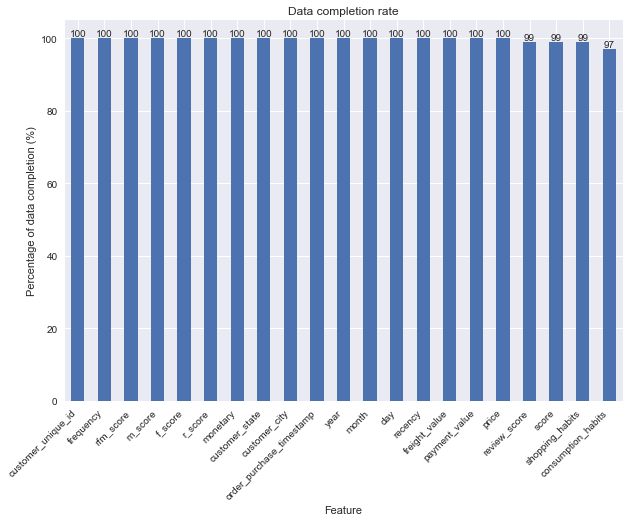

In [24]:
# Displaying dataset information
display_dataset_info(customers_df)

# Displaying the dataset completion rate
display_data_completion_rate(customers_df)

### 1.5.2 Création du jeu de données pour la simulation permettant de déterminer la fréquence nécessaire de mise à jour du modèle de segmentation

Nous commençons par la sélection de la période pour l'étude de la stabilité de la segmentation.
Pour cela, nous allons sélectionner les 12 derniers mois, du 18/10/2017 au 17/10/2018.

In [25]:
# 1.5.2 Creation of the dataset for the simulation to determine
# how often the segmentation model needs to be updated
# Selection of a one-year period (the last 12 months):
# from 01/01/2018 to 17/10/2018
df_2018 = data[data.year == 2018]

# From 18/10/2017 to 31/12/2017
df_2017_1 = data[(data.year == 2017)
                 & (data.month == 10)
                 & (data.day >= 18)]
df_2017_2 = data[(data.year == 2017)
                 & (data.month == 11)]
df_2017_3 = data[(data.year == 2017)
                 & (data.month == 12)]
df_2017 = df_2017_3.append(df_2017_2)
df_2017 = df_2017.append(df_2017_1)

# From 18/10/2017 to 17/10/2018
period_df = df_2018.append(df_2017)
period_df = period_df.sort_values(
    by=["year", "month", "day"], ascending=False)
print(period_df.shape)
period_df.head()

(71099, 44)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,day,month,year,recency
0,10a045cdf6a5650c21e9cfeb60384c16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-17 17:30:18,NaT,NaT,NaT,2018-10-30,17,10,2018,0
1,b059ee4de278302d550a3035c4cdb740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,16,10,2018,1
2,a2ac6dad85cf8af5b0afb510a240fe8c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,3,10,2018,14
3,616fa7d4871b87832197b2a137a115d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,1,10,2018,16
4,392ed9afd714e3c74767d0c4d3e3f477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,29,9,2018,18


In [26]:
# Creation of the dataset with monthly customer data
months = np.unique(list(data.month))
stability_df = pd.DataFrame()
for month in months:
    month_df = period_df[period_df.month == month]
    month_df = month_df.groupby('customer_unique_id').agg(
        recency=('recency', 'mean'),
        frequency=('order_id', 'count'),
        monetary=('payment_value', 'sum'),
        review_score=('review_score', 'mean'))
    month_df['month'] = month
    stability_df = stability_df.append(month_df)

stability_df['customer_unique_id'] = stability_df.index
features = ['customer_unique_id',
            'month',
            'recency',
            'monetary',
            'frequency',
            'review_score']
stability_df = stability_df[features]
stability_df.reset_index(inplace=True, drop=True)
print(stability_df.shape)
stability_df.head()

(68423, 6)


,customer_unique_id,month,recency,monetary,frequency,review_score
0,000d460961d6dbfa3ec6c9f5805769e1,1,283.0,36.68,1,5.0
1,0014a5a58da615f7b01a4f5e194bf5ea,1,272.0,99.82,1,5.0
2,0028cfeb9dfcd3628a56d5b6400deef5,1,283.0,118.20,1,5.0
3,002d3bd901608f67c3fc11eaaa842b13,1,275.0,28.76,1,4.0
4,002ed12115742033f015cb3c269ccf68,1,260.0,109.79,1,5.0


In [27]:
# Creating additional features
# R score, F score and M score
quintiles = stability_df[
    ['recency',
     'frequency',
     'monetary']].quantile([.2, .4, .6, .8]).to_dict()

stability_df['r_score'] = stability_df['recency'].apply(lambda x: score(
    x, 'recency', True))
stability_df['f_score'] = stability_df['frequency'].apply(lambda x: score(
    x, 'frequency', False))
stability_df['m_score'] = stability_df['monetary'].apply(lambda x: score(
    x, 'monetary', False))

# RFM score
r_score = stability_df['r_score'].map(str)
f_score = stability_df['f_score'].map(str)
m_score = stability_df['m_score'].map(str)
stability_df['rfm_score'] = r_score + f_score + m_score
stability_df['rfm_score'] = stability_df['rfm_score'].astype('int64')

# Average score calculation
r_sore = stability_df['r_score']
f_score = stability_df['f_score']
m_score = stability_df['m_score']
review_score = stability_df['review_score']
stability_df['score'] = (r_sore + f_score + m_score + review_score) / 4
print(stability_df.shape)
stability_df.head(10)

(68423, 11)


,customer_unique_id,month,recency,monetary,frequency,review_score,r_score,f_score,m_score,rfm_score,score
0,000d460961d6dbfa3ec6c9f5805769e1,1,283.0,36.68,1,5.0,2,1,1,211,2.25
1,0014a5a58da615f7b01a4f5e194bf5ea,1,272.0,99.82,1,5.0,2,1,3,213,2.75
2,0028cfeb9dfcd3628a56d5b6400deef5,1,283.0,118.20,1,5.0,2,1,3,213,2.75
3,002d3bd901608f67c3fc11eaaa842b13,1,275.0,28.76,1,4.0,2,1,1,211,2.00
4,002ed12115742033f015cb3c269ccf68,1,260.0,109.79,1,5.0,2,1,3,213,2.75
5,003650b504826ea534e02eba0ab58dd5,1,273.0,21.77,1,4.0,2,1,1,211,2.00
6,0036d365b138cc0ee06bed755bcb5044,1,259.0,109.50,1,5.0,2,1,3,213,2.75
7,00370dfde3d012c420d29657afc2fc8b,1,261.0,237.00,1,4.0,2,1,5,215,3.00
8,0037aa56b017c105c3a9d47af71fff98,1,264.0,443.73,1,3.0,2,1,5,215,2.75
9,003c457932a554e4df13834237b1ed00,1,285.0,142.51,1,5.0,2,1,4,214,3.00


Dimensions of the dataset: (68423, 11)

Information about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68423 entries, 0 to 68422
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  68423 non-null  object 
 1   month               68423 non-null  int32  
 2   recency             68423 non-null  float64
 3   monetary            68423 non-null  float64
 4   frequency           68423 non-null  int64  
 5   review_score        67914 non-null  float64
 6   r_score             68423 non-null  int64  
 7   f_score             68423 non-null  int64  
 8   m_score             68423 non-null  int64  
 9   rfm_score           68423 non-null  int64  
 10  score               67914 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 5.5+ MB
None

Data completion rate: 100.0
Missing data rate: 0.0
customer_unique_id    100.00
month                 10

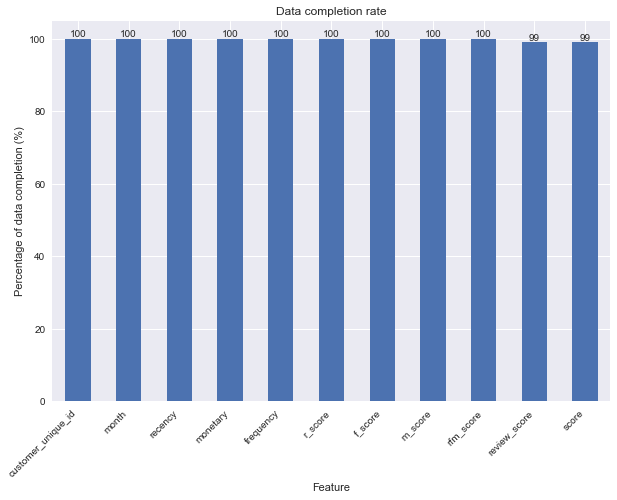

In [28]:
# Displaying dataset information
display_dataset_info(stability_df)

# Displaying the dataset completion rate
display_data_completion_rate(stability_df)

## 1.6 Gestion des valeurs manquantes

customer_unique_id          100.0
frequency                   100.0
price                       100.0
payment_value               100.0
freight_value               100.0
review_score                100.0
recency                     100.0
day                         100.0
month                       100.0
year                        100.0
order_purchase_timestamp    100.0
customer_city               100.0
customer_state              100.0
monetary                    100.0
r_score                     100.0
f_score                     100.0
m_score                     100.0
rfm_score                   100.0
score                       100.0
shopping_habits             100.0
consumption_habits          100.0
dtype: float64


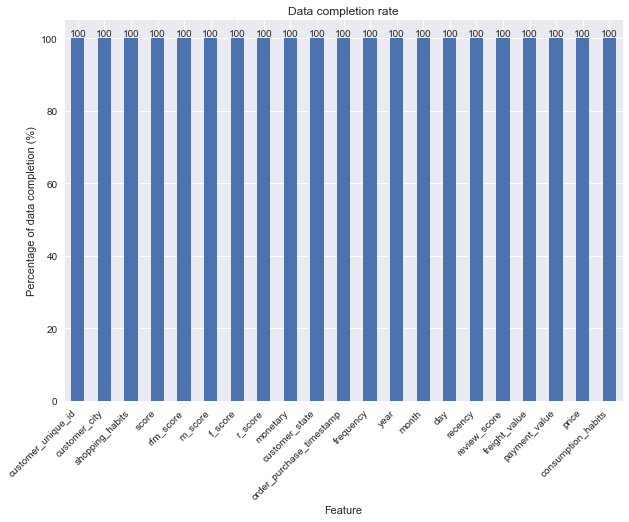

customer_unique_id    100.0
month                 100.0
recency               100.0
monetary              100.0
frequency             100.0
review_score          100.0
r_score               100.0
f_score               100.0
m_score               100.0
rfm_score             100.0
score                 100.0
dtype: float64


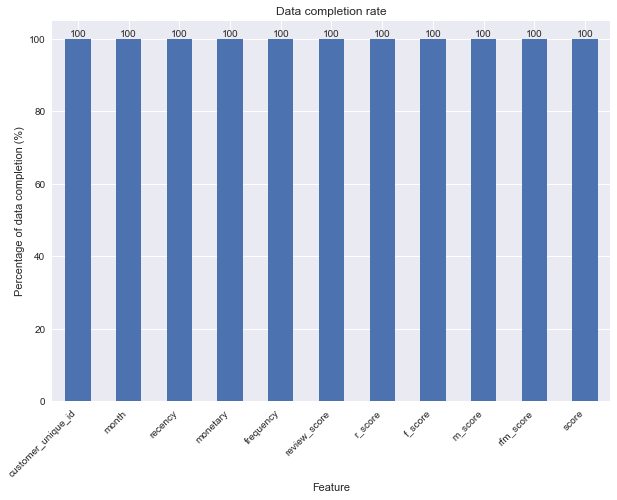

In [29]:
# 1.6 Management of missing values
# Filling review_score missing values by average values 
# Filling categorical features missing values by "unknown"
mean_score = customers_df.score.mean()
mean_review_score = customers_df.review_score.mean()
values = {
    'score': mean_score,
    'review_score': mean_review_score,
    'consumption_habits': 'unknown',
    'shopping_habits': 'unknown'}
customers_df = customers_df.fillna(value=values)
customers_df['score'] = customers_df['score'].astype('int64')

# Filling the average score missing values by average values 
values = {
    'score': mean_score,
    'review_score': mean_review_score}
stability_df = stability_df.fillna(value=values)
stability_df['score'] = stability_df['score'].astype('int64')

# Displaying the dataset completion rate
display_data_completion_rate(customers_df)

# Displaying the dataset completion rate
display_data_completion_rate(stability_df)

# 2. Analyse exploratoire

In [30]:
# 2. Exploratory analysis
def display_pie_chart(customers_df, title):
    """This function displays a pie chart with proportions and value counts."""
    def apply_autopct(values):
        def autopct(proportions):
            result = sum(values)
            value = int(round(proportions * result / 100))
            return '{}% ({})'.format(round(proportions, 1), value)
        return autopct

    explodes = np.zeros(len(customers_df))
    explodes[0] = 0.1

    # Setup the figure
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.axis("equal")
    ax.pie(
        customers_df,
        labels=list(customers_df.index),
        shadow=True,
        explode=explodes,
        autopct=apply_autopct(list(customers_df)),
        textprops=dict(color="black", size=11, weight="bold"))
    plt.title('{} categories'.format(title), size=18, weight="bold")
    plt.axis('equal')
    plt.show()


def display_grouping_prices(customers_df, feature, title, figsize):
    """This function displays a grouping analysis plot."""
    features = [feature,
                'monetary',
                'price',
                'freight_value']
    grouping_df = customers_df[features].groupby(feature).sum()
    dataviz = grouping_df.sort_values(['monetary'],
                                      ascending=False)

    # Setup the figure
    ax = dataviz.plot(kind='bar', figsize=figsize)
    fig = ax.get_figure()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title('Grouping prices by {}'.format(title))
    ax.set_xlabel('{}'.format(feature))
    ax.set_ylabel('Prices')
    plt.show()


def display_grouping_hist(data, feature, title, figsize):
    """This function displays a grouping histogram."""
    value = data[feature].value_counts()
    values = {
        'categories': list(value.index),
        'customers_number': list(value)}
    df = pd.DataFrame(data=values)
    df = df.set_index('categories')
    dataviz = df.sort_values(['customers_number'],
                             ascending=False)

    # Setup the figure
    ax = dataviz.plot(kind='bar', figsize=figsize)
    for value in ax.patches:
        ax.annotate(
            value.get_height(),
            (value.get_x() + value.get_width() / 2,
             value.get_height()),
            ha='center',
            va='bottom')
    fig = ax.get_figure()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title('Grouping customers by {}'.format(title))
    ax.set_xlabel('{}'.format(feature))
    ax.set_ylabel('customers number')
    plt.show()


def display_scores(data, feature):
    """This function displays scores grouping analysis."""
    score1 = len(data[data[feature] <= 1])
    score2 = len(data[(data[feature] > 1)
                      & (data[feature] <= 2)])
    score3 = len(data[(data[feature] > 2)
                      & (data[feature] <= 3)])
    score4 = len(data[(data[feature] > 3)
                      & (data[feature] <= 4)])
    score5 = len(data[(data[feature] > 4)
                      & (data[feature] <= 5)])

    scores = {
        'scores categories': ['1', '2', '3', '4', '5'],
        'customers number': [score1, score2, score3,
                             score4, score5]}
    scores_df = pd.DataFrame(scores)
    scores_df = scores_df.set_index('scores categories')
    scores_df = scores_df.sort_values(['customers number'],
                                      ascending=False)
    return scores_df


def display_hisplot(customers_df, feature):
    """This function displays histplots and KDE plots."""
    # Setup the figure
    fig = plt.figure(figsize=(8, 5))
    sns.histplot(
        x=feature,
        data=customers_df,
        kde=True,
        log_scale=False,
        bins=20)
    plt.xlabel('{}'.format(feature))
    plt.ylabel('Frequency')
    plt.title('Distribution of feature {}'.format(feature))
    plt.show()


def display_histograms(customers_df, features):
    """This function displays histograms."""
    customers_df = customers_df[features]
    features_df = customers_df[customers_df.columns].values

    # Setup the figure
    fig = plt.figure(figsize=(15, 10))
    for value in range(features_df.shape[1]):
        ax = fig.add_subplot(3, 3, (value + 1))
        ax.hist(
            features_df[:, value],
            bins=20,
            color='steelblue',
            density=True,
            edgecolor='none')
        ax.set_title(customers_df.columns[value], fontsize=14)
    plt.show()


def display_boxplots(customers_df, cat_feature, feature):
    """This function displays boxplots of relevant quantitative features
    as a function of a categorical feature.
    """
    order_df = customers_df.groupby(cat_feature)[feature].median().index

    # Setup the figure
    fig = plt.figure(figsize=(15, 15))

    # Graphic properties
    medianprop = {'color': "black"}
    meanprop = {
        'marker': 'o',
        'markeredgecolor': 'black',
        'markerfacecolor': 'black'}
    sns.boxplot(
        x=feature,
        y=cat_feature,
        showfliers=False,
        showmeans=True,
        orient='h',
        medianprops=medianprop,
        meanprops=meanprop,
        order=order_df,
        data=customers_df)
    plt.title('Distribution of {} according to {}'.format(feature,
                                                          cat_feature))
    plt.show()


def apply_anova_test(customers_df, anova_df, cat_feature, features):
    """This function applies the ANOVA test to the variables to analyze
    correlations between quantitative and categorical features.
    """
    anova_df[cat_feature] = list(customers_df[cat_feature])
    for feature in features:
        print("\n{}:".format(feature))
        aov = pg.welch_anova(
            data=anova_df,
            dv=feature,
            between=cat_feature)
        print(aov.round(2))

## 2.1 Feature engineering et exploration du jeu de données

Nous allons commencer cette partie par l'exploration du jeu de données afin de mieux comprendre les différentes variables et leurs contenus. Pour cela, nous utilisons la méthode de segmentation RFM (Récence, Fréquence et Montant) pour effectuer des regroupements par :
- Les catégories de récence ;
- La fréquence des achats ;
- La somme des achats par mois, années et catégories des produits.

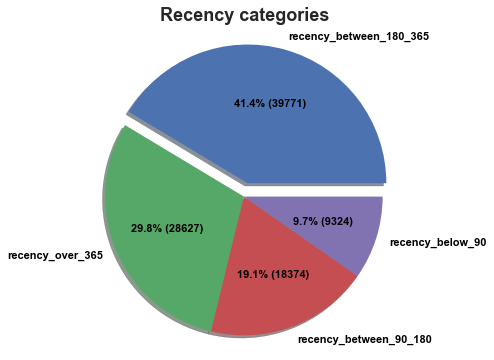

In [31]:
# 2.1 Feature engineering and dataset exploration
# Grouping by using RFM marketing analysis for clustering and segmentation
# Number of customers by Recency category
recency1 = len(customers_df[customers_df.recency < 90])
recency2 = len(customers_df[(customers_df.recency >= 90) 
                            & (customers_df.recency < 180)])
recency3 = len(customers_df[(customers_df.recency >= 180) 
                            & (customers_df.recency < 365)])
recency4 = len(customers_df[customers_df.recency >= 365])
recency = {
    'recency categories': [
        'recency_below_90',
        'recency_between_90_180',
        'recency_between_180_365',
        'recency_over_365'],
    'customers number': [recency1, recency2, recency3, recency4]}
recency_df = pd.DataFrame(data=recency)
recency_df = recency_df.set_index('recency categories')
recency_df = recency_df.sort_values(
    ['customers number'], ascending=False)
display_pie_chart(recency_df['customers number'], 'Recency')

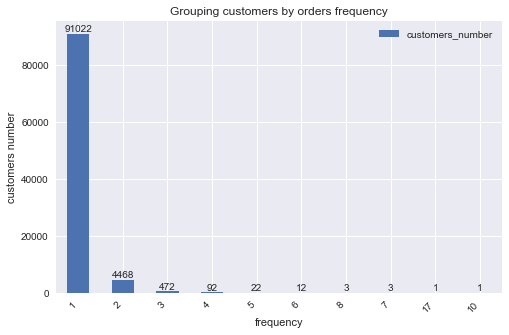

In [32]:
# Frequency
display_grouping_hist(customers_df,
                      'frequency',
                      'orders frequency',
                      (8, 5))

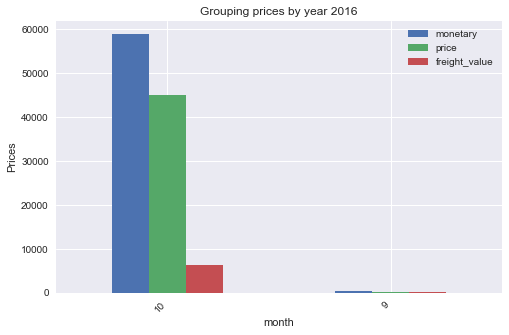

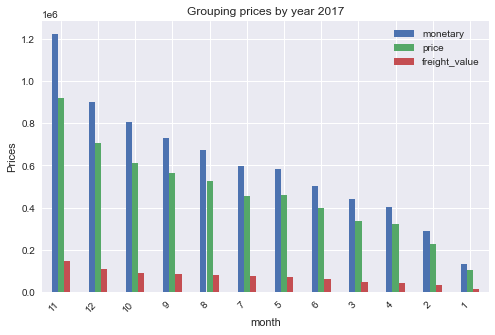

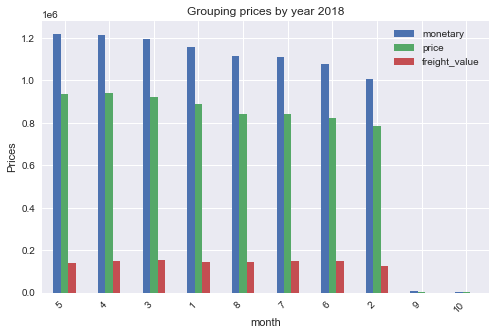

In [33]:
# Monetary
years = [2016, 2017, 2018]
for year in years:
    year_df = customers_df[customers_df.year == year]
    display_grouping_prices(year_df,
                            'month',
                            'year '+str(year),
                            (8, 5))

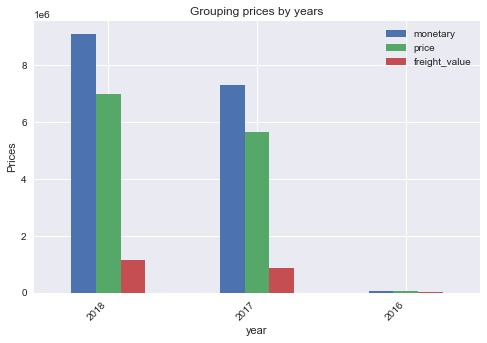

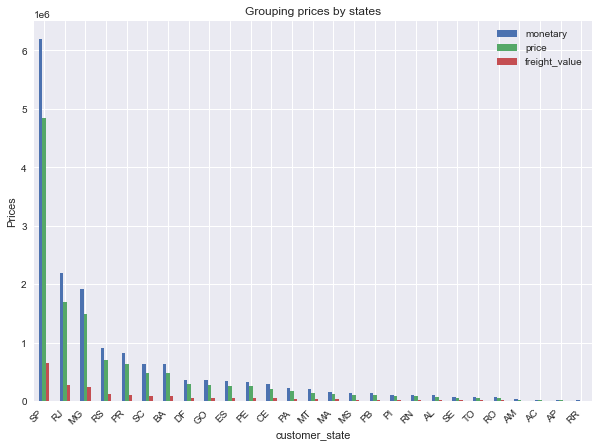

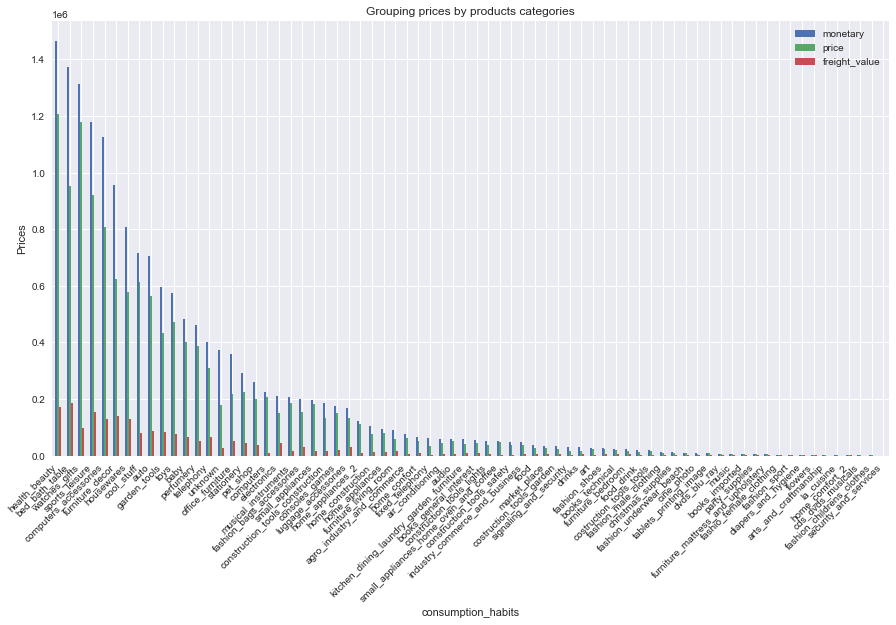

In [34]:
display_grouping_prices(customers_df,
                        'year',
                        'years',
                        (8, 5))
display_grouping_prices(customers_df,
                        'customer_state',
                        'states',
                        (10, 7))
display_grouping_prices(customers_df,
                        'consumption_habits',
                        'products categories',
                        (15, 8))

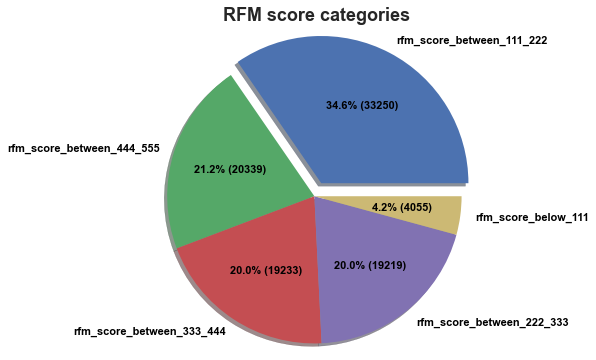

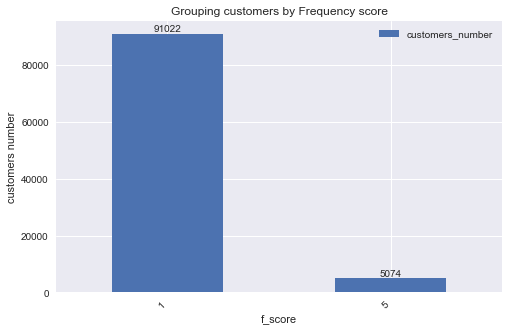

In [35]:
# Customers categories by RFM score 
score1 = len(customers_df[customers_df.rfm_score <= 111])
score2 = len(customers_df[(customers_df.rfm_score > 111)
                          & (customers_df.rfm_score <= 222)])
score3 = len(customers_df[(customers_df.rfm_score > 222)
                          & (customers_df.rfm_score <= 333)])
score4 = len(customers_df[(customers_df.rfm_score > 333)
                          & (customers_df.rfm_score <= 444)])
score5 = len(customers_df[(customers_df.rfm_score > 444)
                          & (customers_df.rfm_score <= 555)])
rfm_score = {
    'rfm_score categories': [
        'rfm_score_below_111',
        'rfm_score_between_111_222',
        'rfm_score_between_222_333',
        'rfm_score_between_333_444',
        'rfm_score_between_444_555'],
    'customers number': [score1, score2, score3, score4, score5]}
rfm_score_df = pd.DataFrame(data=rfm_score)
rfm_score_df = rfm_score_df.set_index('rfm_score categories')
rfm_score_df = rfm_score_df.sort_values(['customers number'],
                                        ascending=False)
display_pie_chart(rfm_score_df['customers number'], 'RFM score')

# Customers categories by Frequency score 
display_grouping_hist(customers_df,
                      'f_score',
                      'Frequency score',
                      (8, 5))

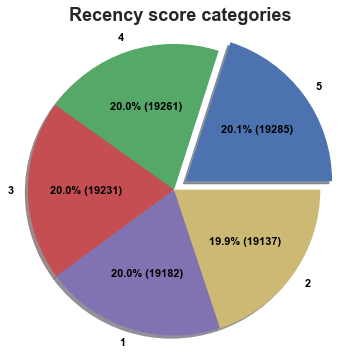

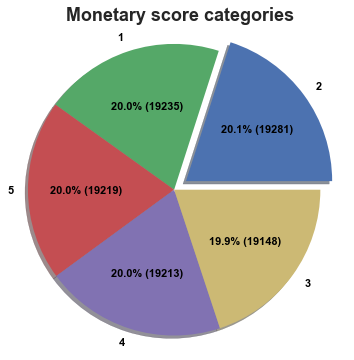

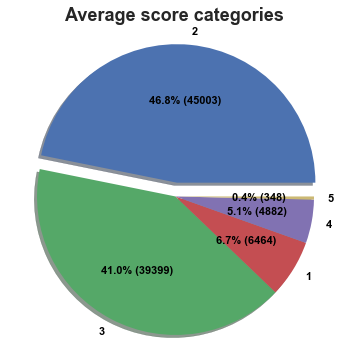

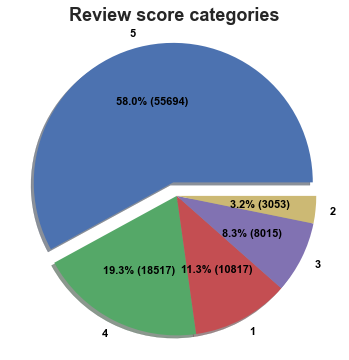

In [36]:
# Customers categories by Recency score
r_score_df = display_scores(customers_df, 'r_score')
display_pie_chart(r_score_df['customers number'],
                  'Recency score')

# Customers categories by Monetary score
m_score_df = display_scores(customers_df,
                            'm_score')
display_pie_chart(m_score_df['customers number'],
                  'Monetary score')

# Customers categories by Average score
score_df = display_scores(customers_df, 'score')
display_pie_chart(score_df['customers number'],
                  'Average score')

# Customers categories by Review score
review_score_df = display_scores(customers_df, 'review_score')
display_pie_chart(review_score_df['customers number'],
                  'Review score')

## 2.2 Sélection des variables pertinentes

In [37]:
# 2.2 Selection of relevant features
# Numerical features
numerical_features = ['recency', 'frequency', 'monetary',
                      'rfm_score', 'r_score', 'f_score',
                      'm_score', 'score', 'review_score']

# Categorical features
categorical_features = ['consumption_habits',
                        'shopping_habits',
                        'customer_city',
                        'customer_state']

distribution_cat_features = ['consumption_habits',
                             'customer_state']

## 2.3 Analyse univariée

### 2.3.1 Mise en place des indicateurs statistiques classiques

In [38]:
# 2.3 Univariate analysis
# 2.3.1 Implementation of classic statistical indicators
# Description of the dataset
customers_df.describe(include="all")

,customer_unique_id,frequency,price,payment_value,freight_value,review_score,recency,day,month,year,...,customer_city,customer_state,monetary,r_score,f_score,m_score,rfm_score,score,shopping_habits,consumption_habits
count,96096,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,...,96096,96096,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096,96096
unique,96096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4118,27,NaN,NaN,NaN,NaN,NaN,NaN,607,72
top,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,bed_bath_table
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14974,40295,NaN,NaN,NaN,NaN,NaN,NaN,23707,8902
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.061397,131.796830,171.127344,21.228072,4.084718,288.108797,15.499709,6.034133,2017.545631,...,NaN,NaN,171.127344,3.003434,1.211205,2.998959,315.454421,2.455201,NaN,NaN
std,NaN,0.289716,198.655028,251.753752,17.410242,1.337219,153.417869,8.668232,3.228970,0.504477,...,NaN,NaN,251.753752,1.414489,0.894552,1.414655,141.973326,0.711242,NaN,NaN
min,NaN,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2016.000000,...,NaN,NaN,0.000000,1.000000,1.000000,1.000000,111.000000,1.000000,NaN,NaN
25%,NaN,1.000000,43.890000,61.630000,13.470000,4.000000,164.000000,8.000000,3.000000,2017.000000,...,NaN,NaN,61.630000,2.000000,1.000000,2.000000,212.000000,2.000000,NaN,NaN


In [39]:
# Creating a dataframe with relevant statistical indicators
statistics_df = customers_df[numerical_features]
statistics_data = pd.DataFrame(columns=['features', 'mean', 'median',
                                        'std', 'variance', 'mode',
                                        'skewness', 'kurtosis'])
statistics_data['features'] = numerical_features

for i in range(len(numerical_features)):
    mean = statistics_df.loc[:, numerical_features[i]].mean()
    statistics_data.loc[i, 'mean'] = round(mean, 2)
    median = statistics_df.loc[:, numerical_features[i]].median()
    statistics_data.loc[i, 'median'] = round(median, 2)
    std = statistics_df.loc[:, numerical_features[i]].std()
    statistics_data.loc[i, 'std'] = round(std, 2)
    variance = statistics_df.loc[:, numerical_features[i]].var(ddof=0)
    statistics_data.loc[i, 'variance'] = round(variance, 2)
    mode = statistics_df.loc[:, numerical_features[i]].mode().mean()
    statistics_data.loc[i, 'mode'] = round(mode, 2)
    skew = statistics_df.loc[:, numerical_features[i]].skew()
    statistics_data.loc[i, 'skewness'] = round(skew, 2)
    kurtosis = statistics_df.loc[:, numerical_features[i]].kurtosis()
    statistics_data.loc[i, 'kurtosis'] = round(kurtosis)
statistics_data

,features,mean,median,std,variance,mode,skewness,kurtosis
0,recency,288.11,269.0,153.42,23536.8,327.0,0.45,-1
1,frequency,1.06,1.0,0.29,0.08,1.0,7.97,161
2,monetary,171.13,106.87,251.75,63379.29,77.57,9.29,210
3,rfm_score,315.45,313.0,141.97,20156.22,212.0,-0.0,-1
4,r_score,3.0,3.0,1.41,2.0,5.0,-0.0,-1
5,f_score,1.21,1.0,0.89,0.8,1.0,4.0,14
6,m_score,3.0,3.0,1.41,2.0,2.0,0.0,-1
7,score,2.46,2.0,0.71,0.51,2.0,0.17,0
8,review_score,4.08,5.0,1.34,1.79,5.0,-1.37,1


### 2.3.2 Distributions des variables

#### 2.3.2.1 Les boxplots

Les boxplots permettent de voir la distribution des variables et leurs dispersions.

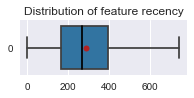

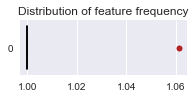

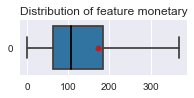

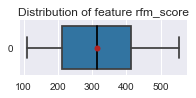

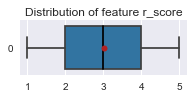

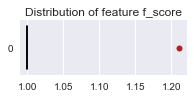

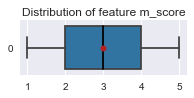

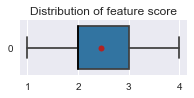

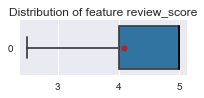

In [40]:
# 2.3.2 Distributions of features
# 2.3.2.1 Boxplots
for feature in numerical_features:
    # Setup the figure
    fig = plt.figure(figsize=(3, 1))

    # Graphic properties
    medianprop = {'color': "black"}
    meanprop = {
        'marker': 'o',
        'markeredgecolor': 'black',
        'markerfacecolor': 'firebrick'}
    plt.title('Distribution of feature {}'.format(feature))
    sns.boxplot(
        data=customers_df[feature],
        showfliers=False,
        showmeans=True,
        color='tab:blue',
        medianprops=medianprop,
        meanprops=meanprop,
        orient='h')
    plt.show()

#### 2.3.2.2 Les histogrammes

Visualisation des fréquences.

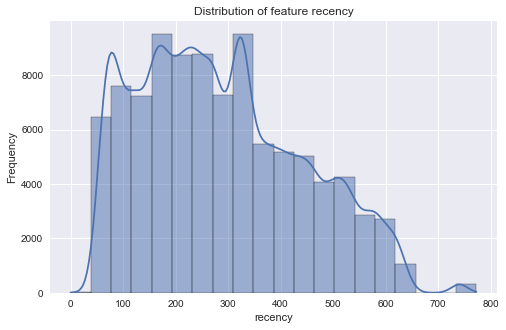

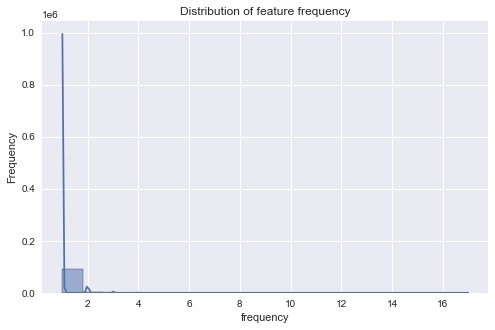

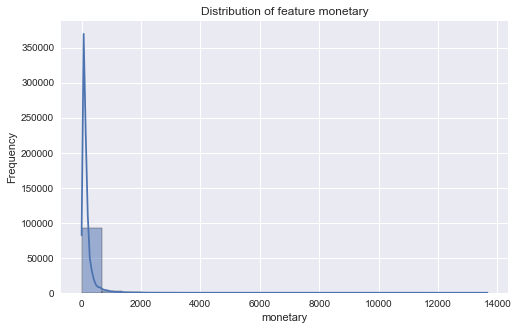

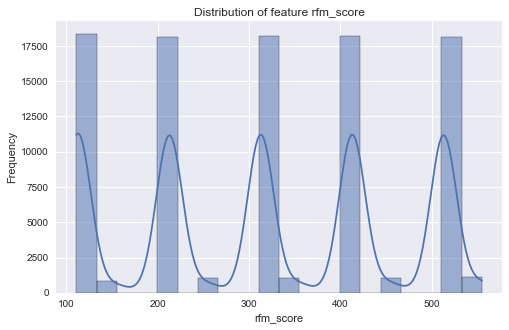

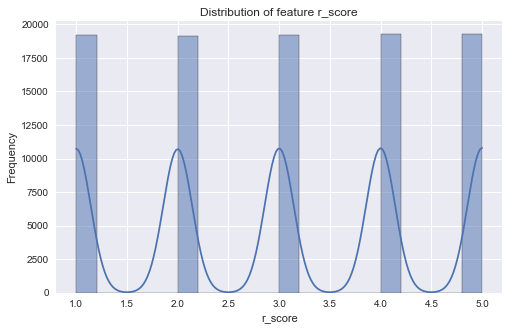

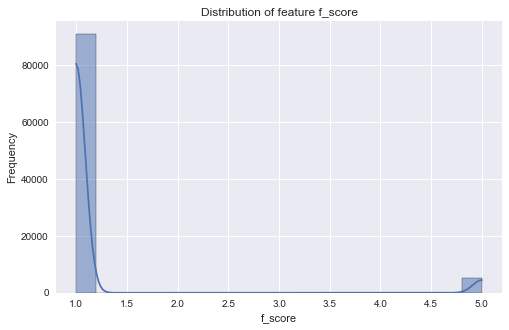

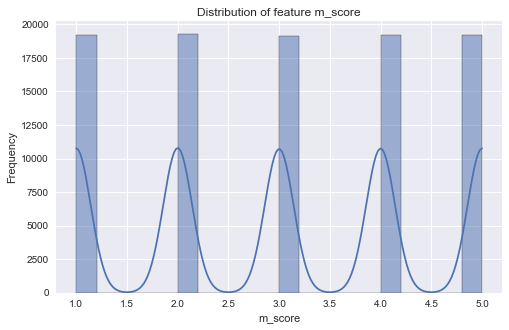

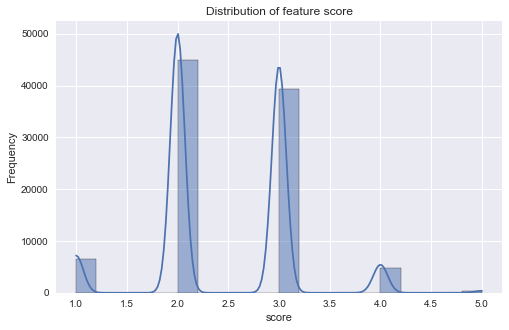

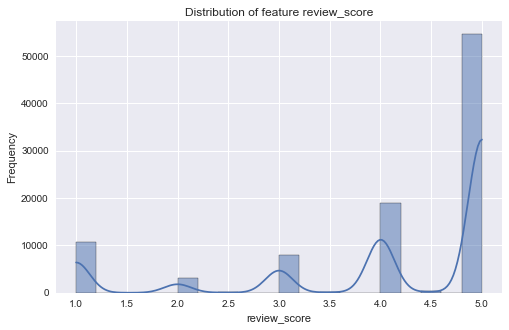

In [41]:
# 2.3.2.2 Histograms
# Displaying frequency
for feature in numerical_features:
    display_hisplot(customers_df[numerical_features], feature)

Visualisation des densités.

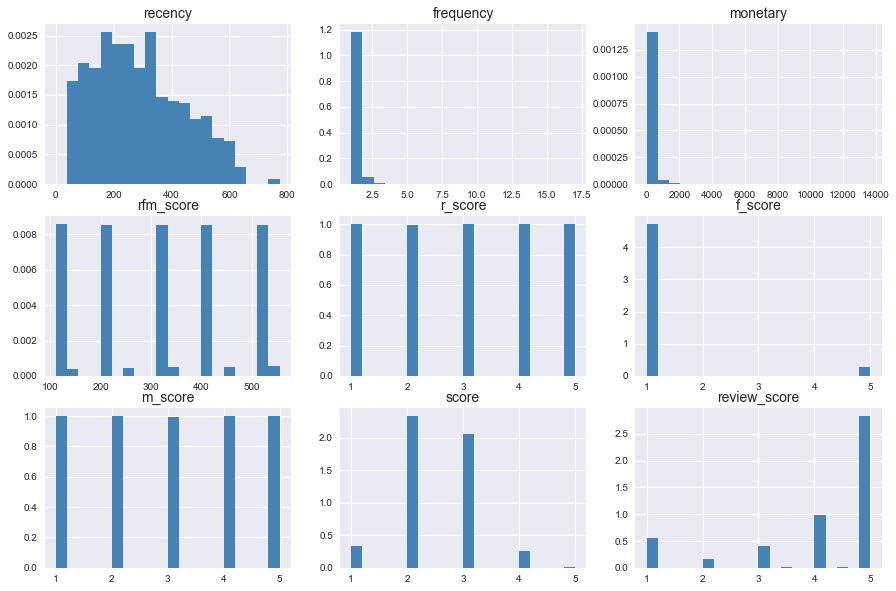

In [42]:
# Displaying density
display_histograms(customers_df, numerical_features)

Les distributions des variables ne suivent pas la distribution normale.

### 2.3.3 Test d'adéquation des variables à une loi normale et test d'égalité des variances

On peut tester l'adéquation des variables à une loi normale à l'aide du test d'adéquation de Kolmogorov-Smirnov :

In [43]:
# 2.3.3 Test of adequacy of variables to a normal distribution
# and variances equality test
# Features normality test
pg.normality(customers_df[numerical_features],
             method='normaltest',
             alpha=0.05)

,W,pval,normal
recency,6987.432626,0.000000e+00,False
frequency,135352.886244,0.000000e+00,False
monetary,146991.114815,0.000000e+00,False
rfm_score,274495.595450,0.000000e+00,False
r_score,373996.248928,0.000000e+00,False
f_score,76005.661740,0.000000e+00,False
m_score,385792.972065,0.000000e+00,False
score,519.629619,1.458350e-113,False
review_score,18434.443579,0.000000e+00,False


Les p-values sont nulles ou proches de zéro. On rejette donc très largement l'hypothèse de normalité au niveau du test 5%. Il faut donc améliorer la qualité des données par la normalisation des variables.

Nous effectuons ensuite le test d'égalité des variances. Le test de Levene est utilisé lorsque les distributions des variables ne suivent pas la loi normale.

In [44]:
# Variances equality test
pg.homoscedasticity(customers_df[numerical_features],
                    method='levene',
                    alpha=0.05)

,W,pval,equal_var
levene,44138.561047,0.0,False


La p-value est nulle. On constate que l'hypothèse d'égalité des variances est très facilement rejetée à un niveau du test de 5%.

## 2.4 Analyse multivariée

### 2.4.1 La matrice des corrélations

Nous analysons les corrélations entre les variables quantitatives afin de ne pas prendre en compte les variables fortement corrélées lors de la sélection des variables pertinentes pour les essais des différentes approches de modélisation.

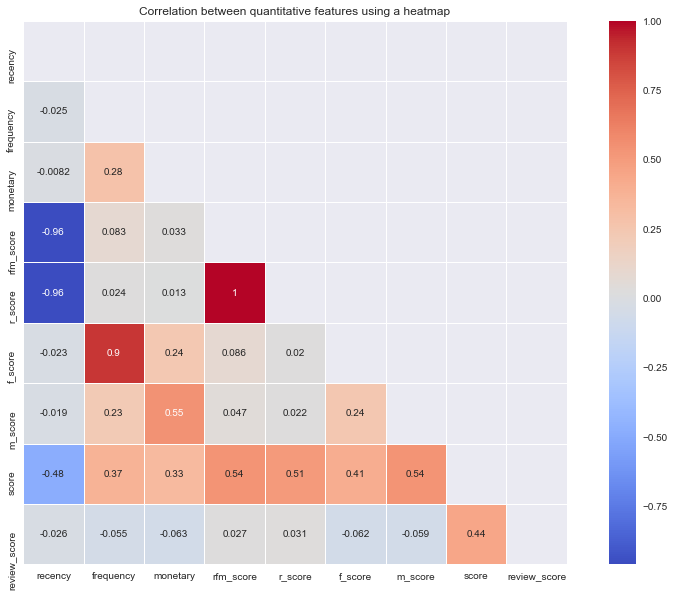

In [45]:
# 2.4 Multivariate analysis
# 2.4.1 The correlation matrix
# Displaying correlation heatmap
corr = customers_df[numerical_features]
corr = corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))

# Setup the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap='coolwarm',
    mask=mask,
    vmax=1,
    square=True,
    linewidths=.5,
    cbar=True,
    annot=True)
plt.title('Correlation between quantitative features using a heatmap')
plt.show()

### 2.4.2 Les diagrammes de dispersion

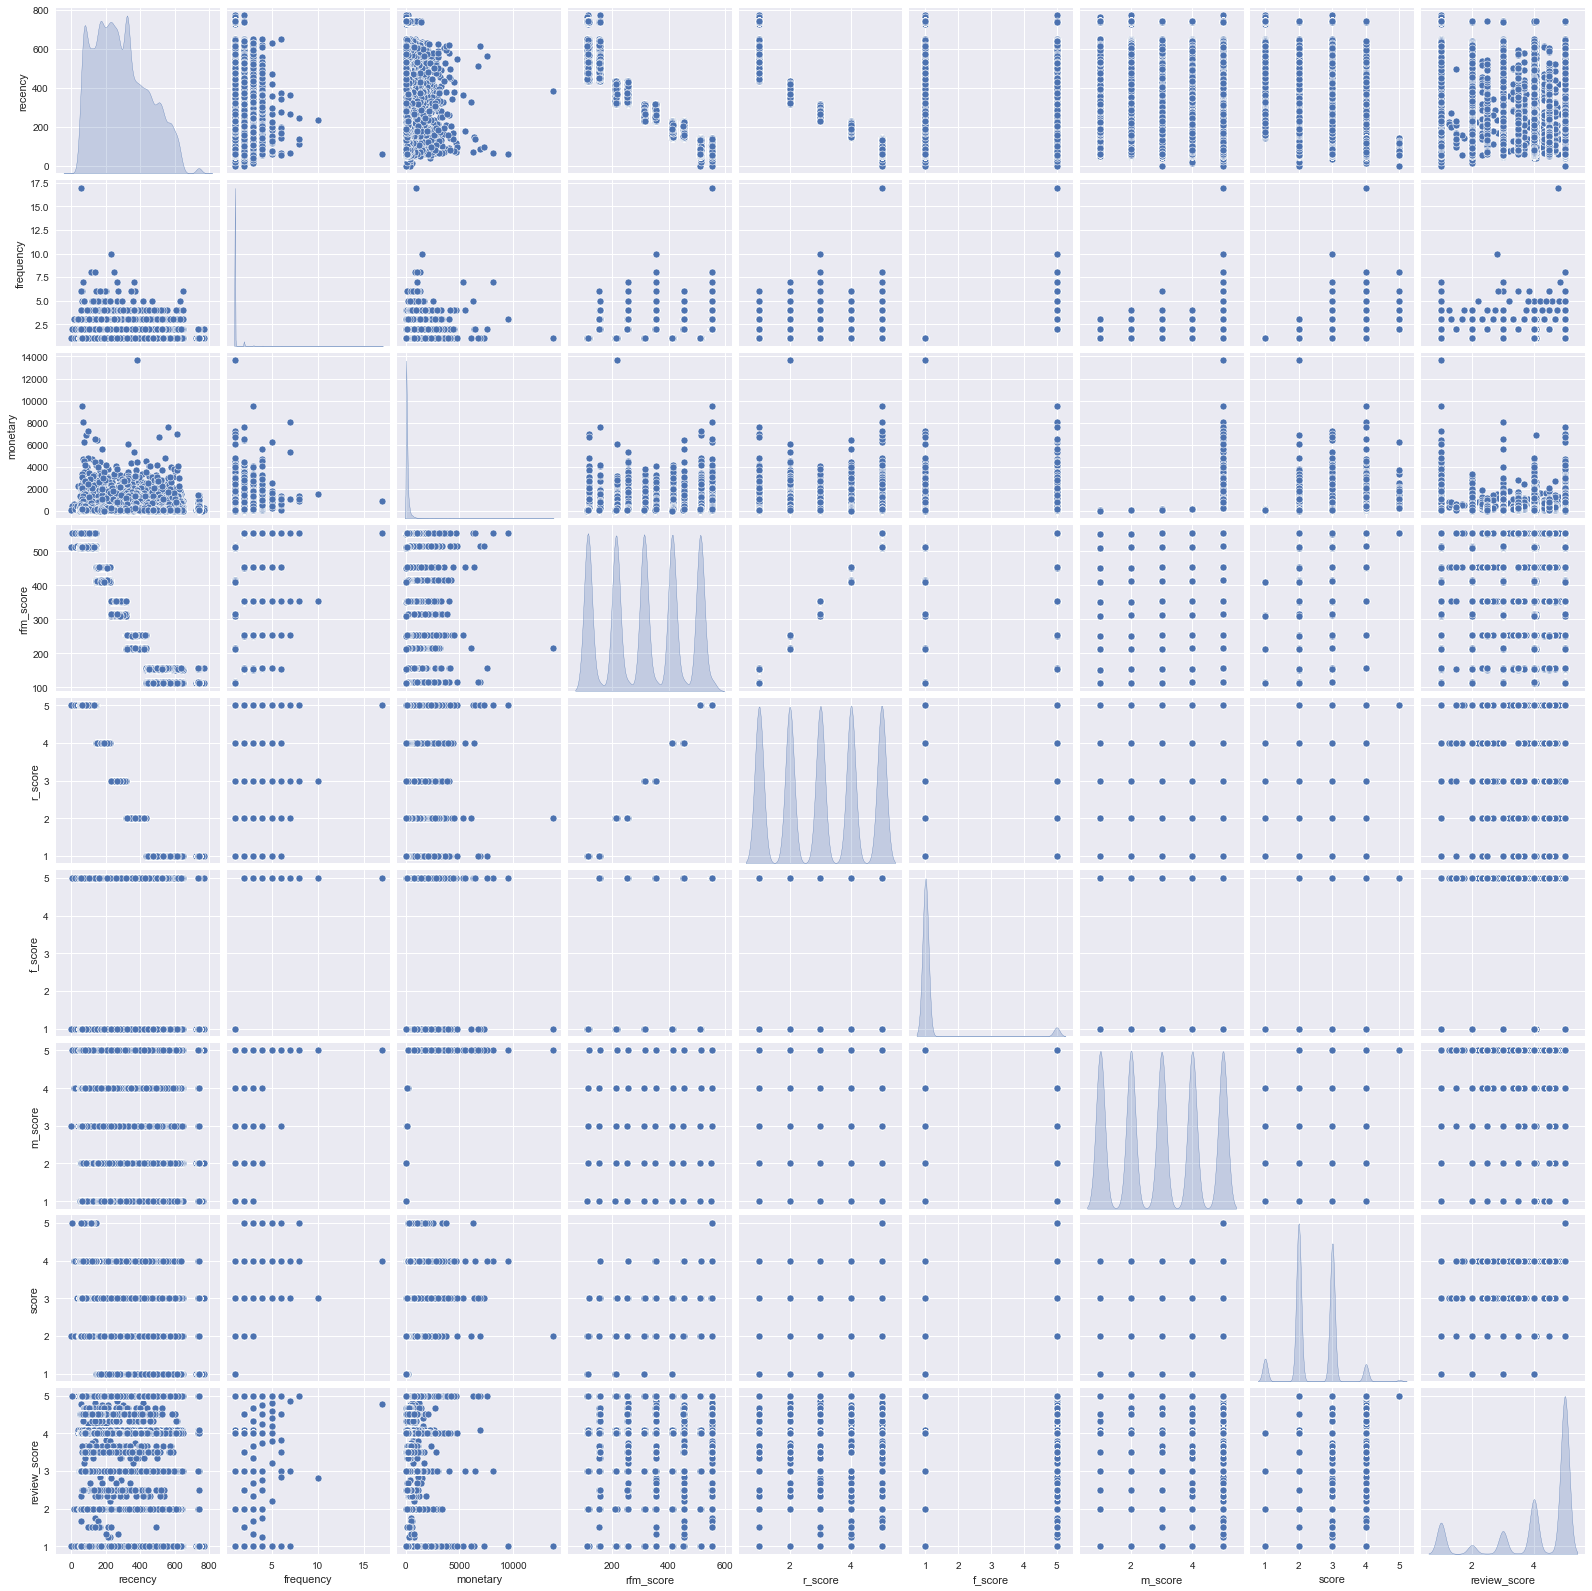

In [46]:
# 2.4.2 Scatter plots
sns.pairplot(customers_df[numerical_features], diag_kind='kde')

L'analyse des corrélations entre les variables quantitatives nous a permis de sélectionner les variables pertinentes suivantes pour la suite des études :
- recency ;
- frequency ;
- monetary ;
- review_score ;
- score.

In [47]:
numerical_features = ['recency', 'frequency', 'monetary',
                      'review_score', 'score']

### 2.4.3 Analyse bivariée entre les variables quantitatives et les variables catégorielles

####  Affichage de la distribution des variables pertinentes en fonction des variables catégorielles

Les boxplots permettent de voir la répartition des variables quantitatives pertinentes en fonction des variables catégorielles.

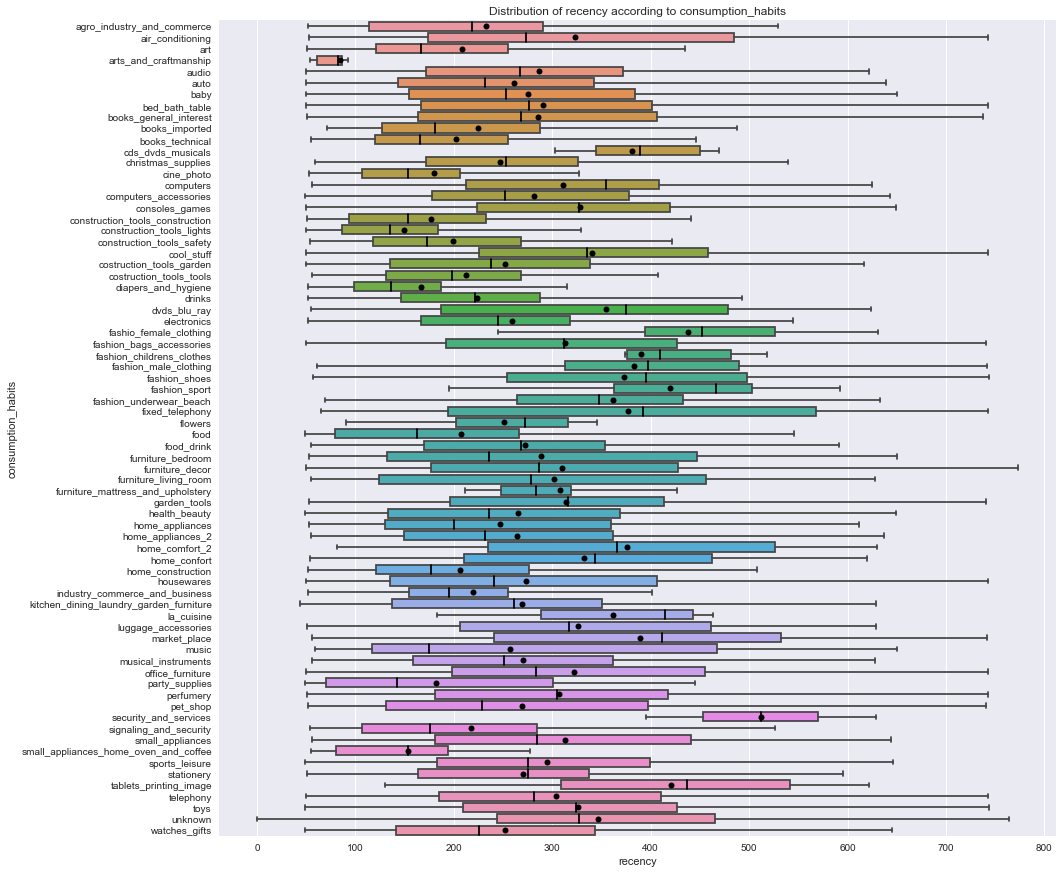

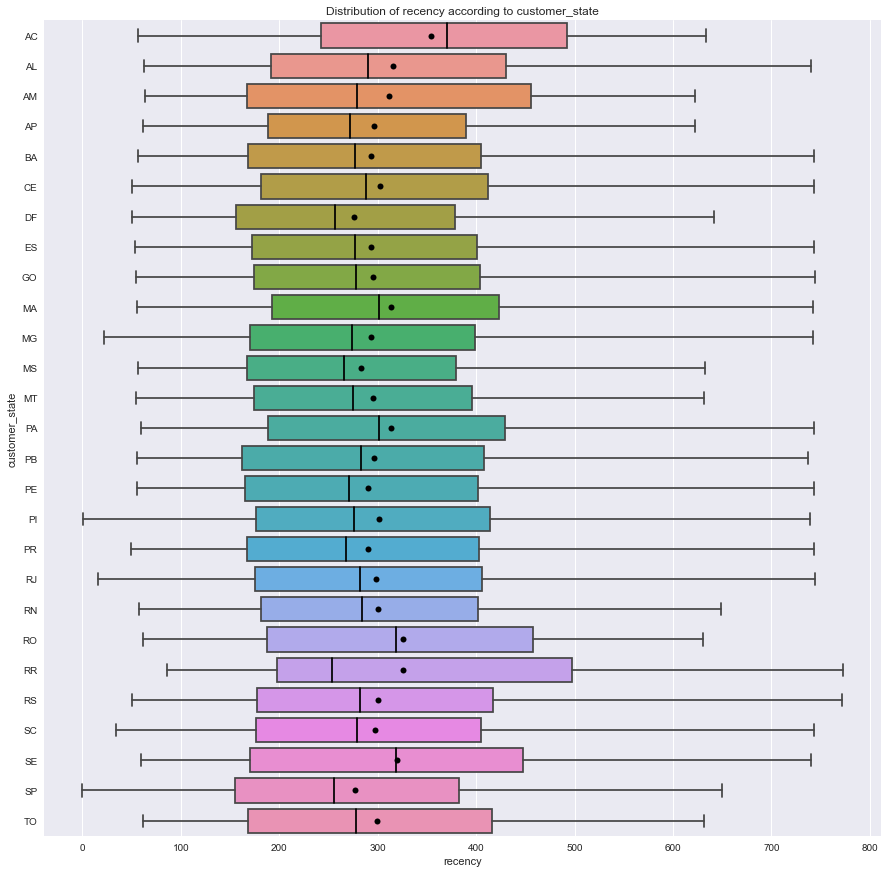

In [48]:
# 2.4.3 Bivariate analysis between quantitative and categorical features
# Distribution of feature "recency"
# as a function of categorical features
for cat_feature in distribution_cat_features:
    display_boxplots(customers_df, cat_feature, 'recency')

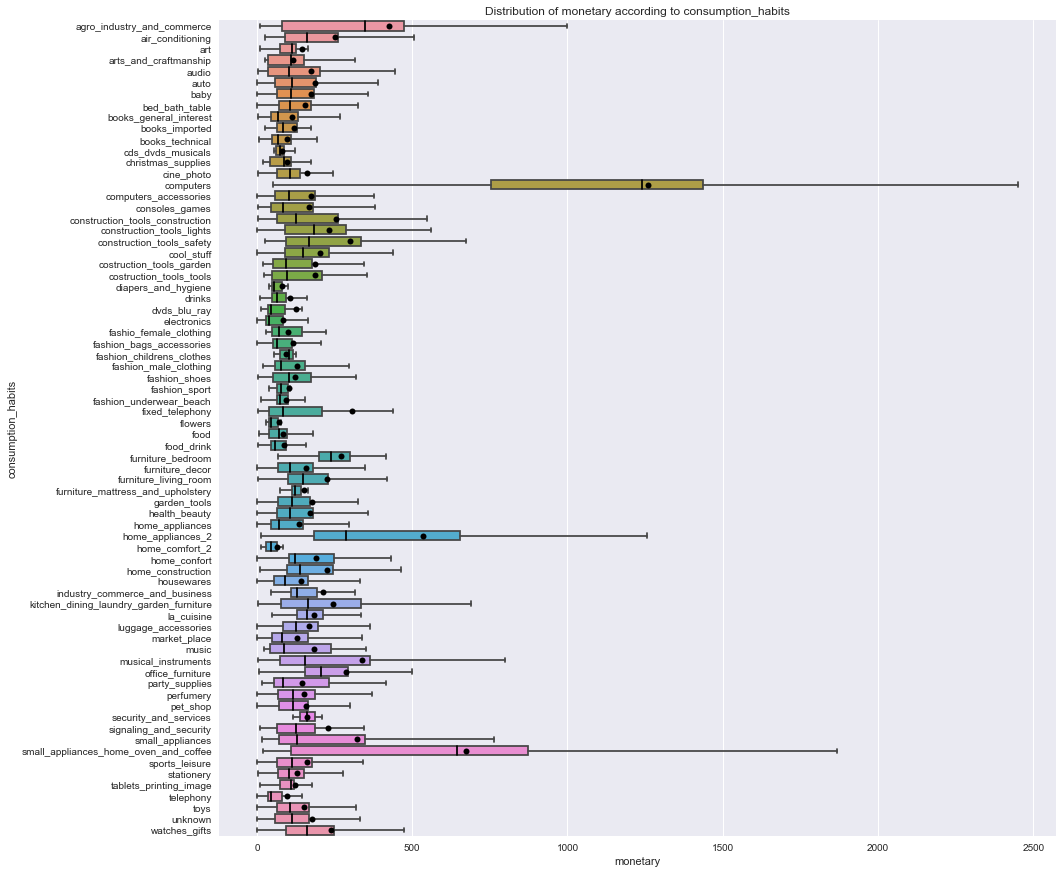

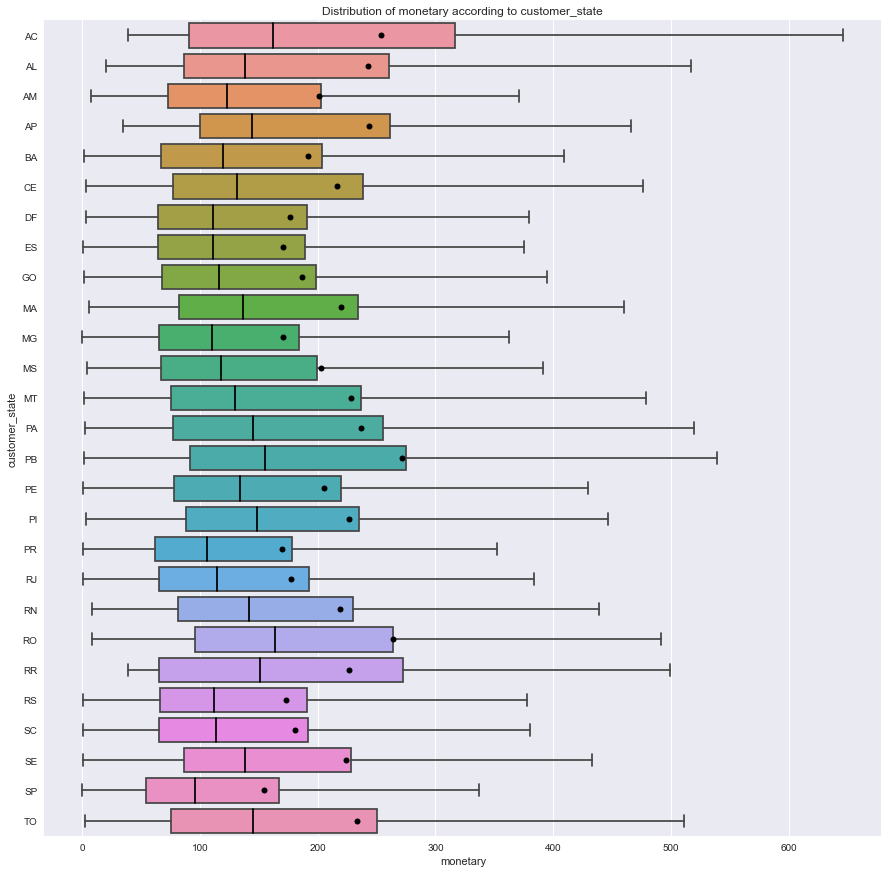

In [49]:
# Distribution of feature "monetary"
# as a function of categorical features
for cat_feature in distribution_cat_features:
    display_boxplots(customers_df, cat_feature, 'monetary')

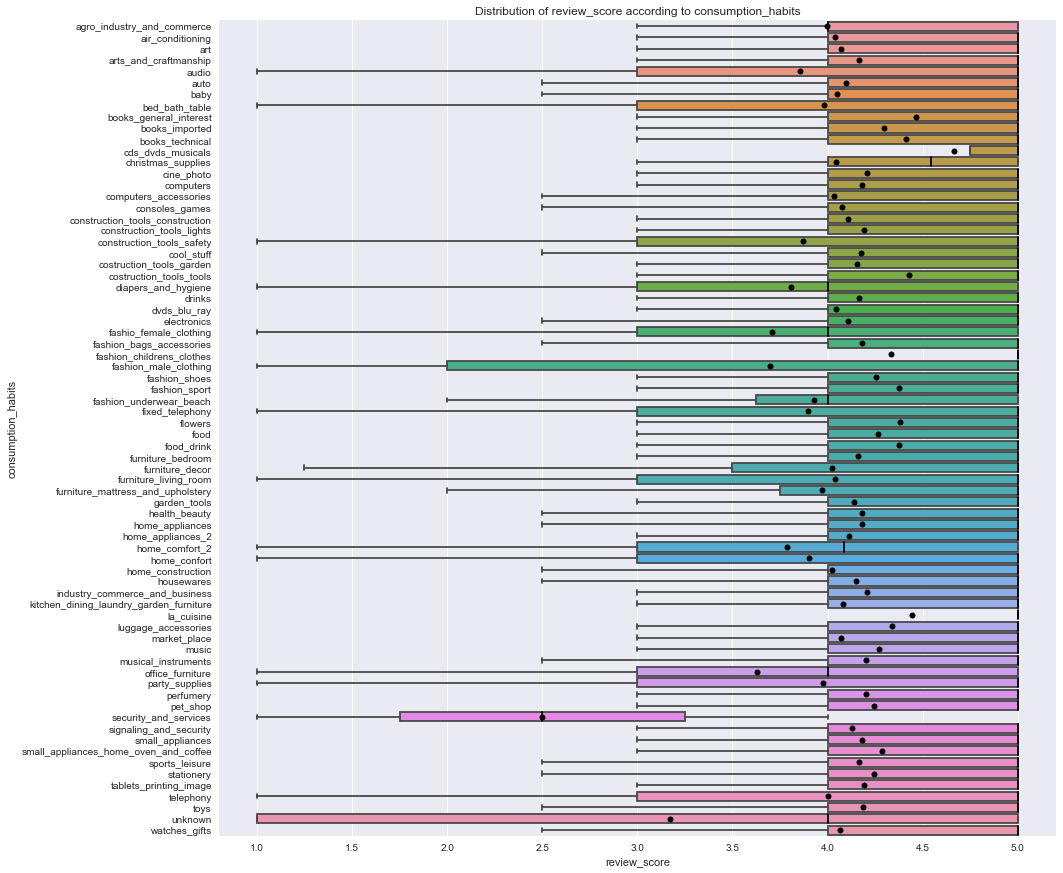

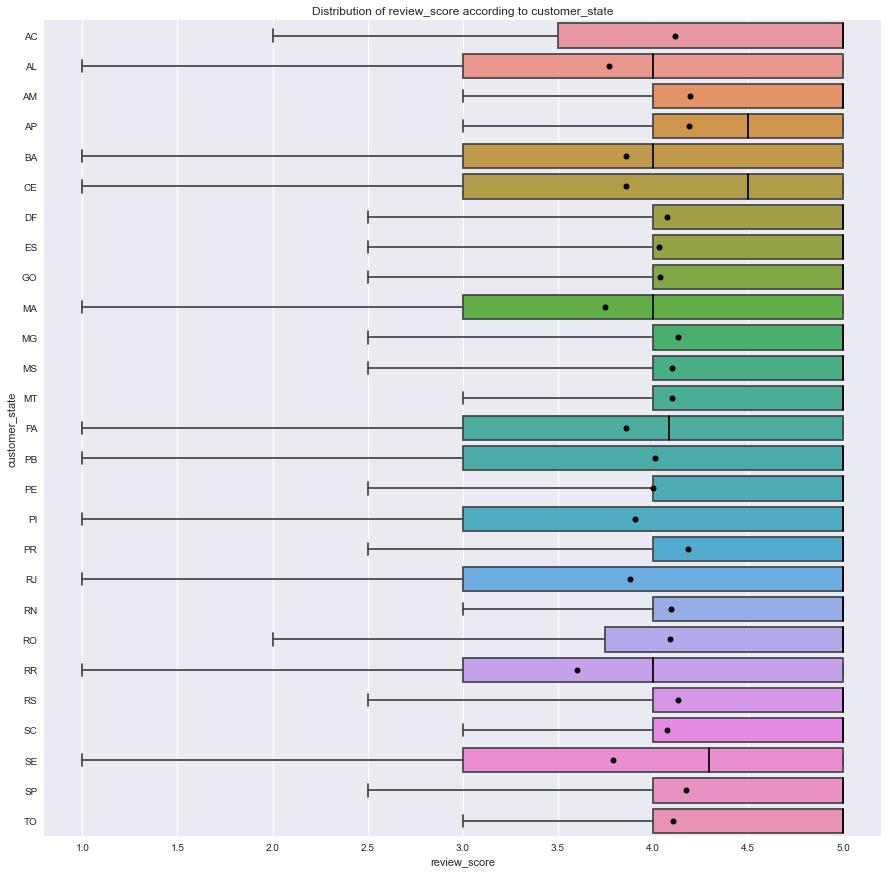

In [50]:
# Distribution of feature "review_score"
# as a function of categorical features
for cat_feature in distribution_cat_features:
    display_boxplots(customers_df, cat_feature, 'review_score')

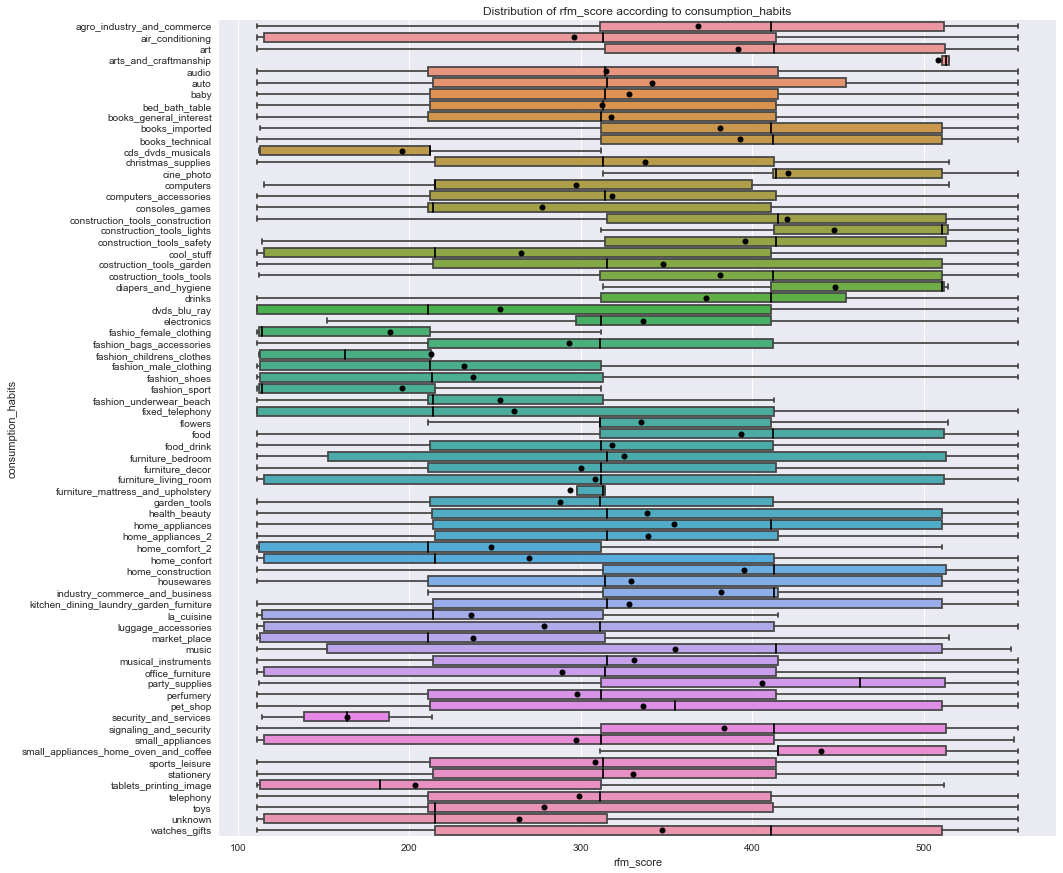

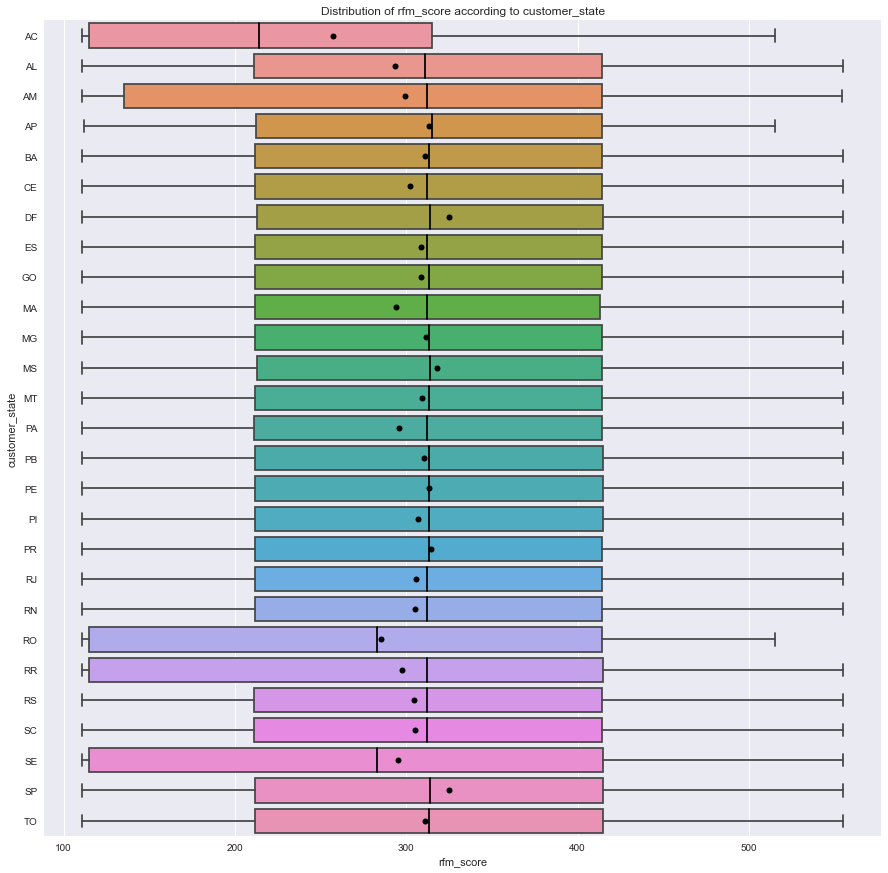

In [51]:
# Distribution of feature "rfm_score"
# as a function of categorical features
for cat_feature in distribution_cat_features:
    display_boxplots(customers_df, cat_feature, 'rfm_score')

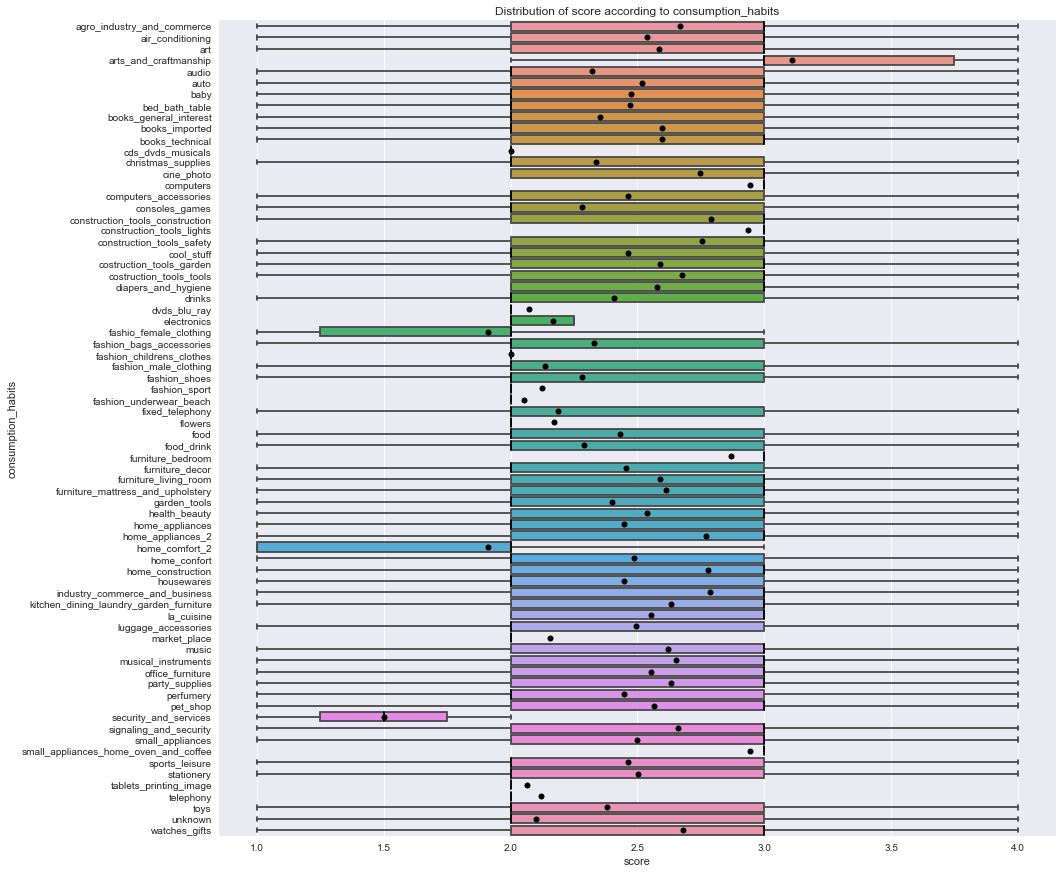

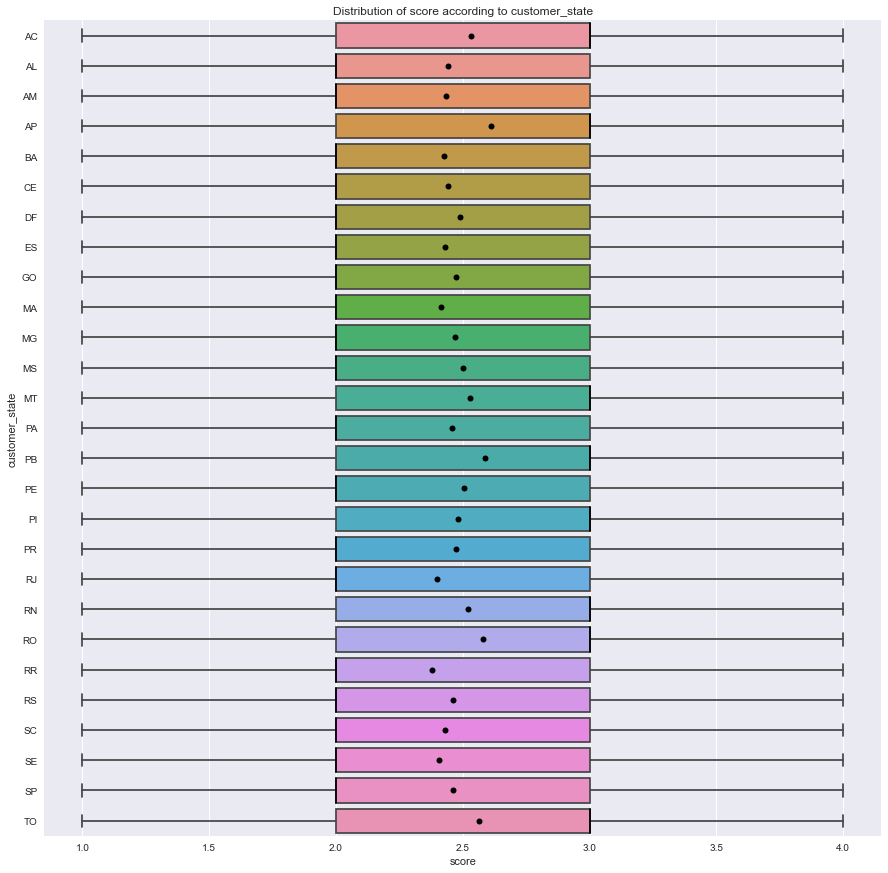

In [52]:
# Distribution of feature "score"
# as a function of categorical features
for cat_feature in distribution_cat_features:
    display_boxplots(customers_df, cat_feature, 'score')

### 2.4.4 Analyse de la variance ou ANOVA et calcul du rapport de corrélation ou η²

La méthode ANOVA est une analyse de la variance entre une variable catégorielle et une variable quantitative. On peut s'interroger sur le lien de dépendance entre les variables quantitatives et les variables catégorielles pertinentes.

Le test ANOVA se base sur l'hypothèse que les variables sont normalement distribuées et ont des variances égales. C'est pourquoi, nous allons normaliser les données pour que les distributions des variables se rapprochent d'une distribution normale et les standardiser pour ramener leur moyenne à 0 et leur écart-type à 1.

Nous allons commencer par normaliser les données.

In [53]:
# 2.4.4 Analysis of variance or ANOVA and calculation of the correlation ratio or η²
# Normalization of relevant data
norm_data = customers_df[numerical_features]
transformer = QuantileTransformer(output_distribution='normal',
                                  random_state=0)
norm_data = pd.DataFrame(transformer.fit_transform(norm_data),
                         columns=norm_data.columns)
print(norm_data.shape)
norm_data.head()

(96096, 5)


,recency,frequency,monetary,review_score,score
0,-2.289988,5.199338,2.131998,-0.171982,1.895259
1,-0.218773,3.269336,2.535839,-1.054855,0.645631
2,-1.100140,3.197551,2.108625,5.199338,5.199338
3,-0.864365,3.197551,2.420230,5.199338,5.199338
4,-0.137177,3.197551,2.255776,5.199338,1.895259


Nous pouvons maintenant standardiser les données, c'est-à-dire les centrer (ramener leur moyenne à 0) et les réduire (ramener leur écart-type à 1), afin qu'elles se placent toutes à peu près sur la même échelle.

In [54]:
# Standardization: centering and scaling data
scaler = StandardScaler()
norm_data = pd.DataFrame(scaler.fit_transform(norm_data),
                         columns=norm_data.columns)
print(norm_data.shape)
norm_data.head()

(96096, 5)


,recency,frequency,monetary,review_score,score
0,-2.292194,6.224958,2.133345,-0.629322,1.375167
1,-0.218819,5.025818,2.537372,-0.866563,0.560095
2,-1.101105,4.981216,2.109961,0.814030,3.530258
3,-0.865085,4.981216,2.421710,0.814030,3.530258
4,-0.137138,4.981216,2.257179,0.814030,1.375167


On peut visualiser de nouveau les données pour vérifier que les différentes variables prennent des valeurs qui ont maintenant des ordres de grandeur similaires.

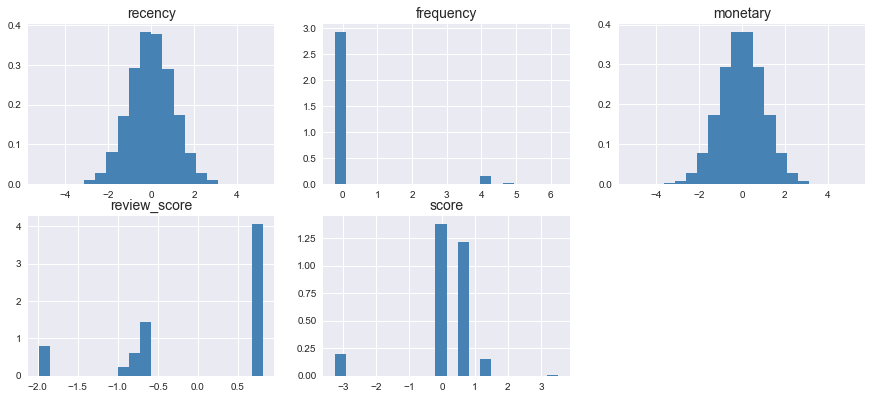

In [55]:
# Displaying histograms
display_histograms(norm_data, numerical_features)

Nous allons appliquer le test ANOVA aux variables.

In [56]:
# Applying ANOVA test
for cat_feature in categorical_features:
    apply_anova_test(customers_df,
                     norm_data,
                     cat_feature,
                     numerical_features)


recency:
               Source  ddof1   ddof2      F  p-unc   np2
0  consumption_habits     71  866.47  67.63    0.0  0.04

frequency:
               Source  ddof1    ddof2    F  p-unc   np2
0  consumption_habits     71  3220.82  0.0    1.0  0.01

monetary:
               Source  ddof1   ddof2       F  p-unc   np2
0  consumption_habits     71  866.52  194.93    0.0  0.11

review_score:
               Source  ddof1   ddof2      F  p-unc   np2
0  consumption_habits     71  866.33  16.29    0.0  0.01

score:
               Source  ddof1   ddof2      F  p-unc   np2
0  consumption_habits     71  866.57  43.09    0.0  0.03

recency:
            Source  ddof1    ddof2    F  p-unc   np2
0  shopping_habits    606  1370.28  0.0    1.0  0.12

frequency:
            Source  ddof1    ddof2    F  p-unc   np2
0  shopping_habits    606  8314.78  0.0    1.0  0.01

monetary:
            Source  ddof1    ddof2    F  p-unc   np2
0  shopping_habits    606  1355.16  0.0    1.0  0.17

review_score:
        

# 3. Analyse en composantes principales ou ACP

L'analyse en composantes principales consiste à étudier :
- La variabilité entre les individus (les différences et les ressemblances entre individus) ;
- Les liaisons entre les variables.

Son objectif est de déterminer les directions dans lesquelles le jeu de données possède le plus de variance et de projeter linéairement les données dans ces directions-là. Cette projection permet de mieux visualiser le comportement du phénomène observé.

In [57]:
# 3. Principal component analysis or PCA
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None,
                    label_rotation=0, lims=None):
    """This function displays circles of correlations."""
    # Display the first 3 factorial planes, the first 6 components
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # Setup the figure
            fig = plt.figure(figsize=(8, 8))

            # Determination of the limits of the graph
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                x_min = min(pcs[d1, :])
                x_max = max(pcs[d1, :])
                y_min = min(pcs[d2, :])
                y_max = max(pcs[d2, :])
                xmin, xmax, ymin, ymax = x_min, x_max, y_min, y_max

            # Displaying arrows
            # If there are more than 30 arrows,
            # the triangle at their end is not displayed
            if pcs.shape[1] < 30:
                plt.quiver(
                    np.zeros(pcs.shape[1]),
                    np.zeros(pcs.shape[1]),
                    pcs[d1, :],
                    pcs[d2, :], angles='xy',
                    scale_units='xy',
                    scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(lines,
                                                 axes=ax,
                                                 alpha=.1,
                                                 color='black'))

            # Displaying features name
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(
                            x, y,
                            labels[i],
                            fontsize='14',
                            ha='center',
                            va='center',
                            rotation=label_rotation,
                            color="blue",
                            alpha=0.8)

            # Displaying circle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Definition of the limits of the graph
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # Displaying horizontal and vertical lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Name of the axes, with the percentage of explained inertia
            var_ratio1 = round(100 * pca.explained_variance_ratio_[d1], 1)
            var_ratio2 = round(100 * pca.explained_variance_ratio_[d2], 1)
            plt.xlabel('F{} ({}%)'.format(d1 + 1, var_ratio1))
            plt.ylabel('F{} ({}%)'.format(d2 + 1, var_ratio2))

            plt.title("Circle of correlations" \
                      " (F{} and F{})".format(d1 + 1, d2 + 1))
            plt.show()


def display_scree_plot(pca):
    """This function displays the scree of eigen values."""
    # Setup the figure
    fig = plt.figure(figsize=(8, 5))
    scree = pca.explained_variance_ratio_ * 100
    plt.bar(np.arange(len(scree)) + 1, scree)
    plt.plot(
        np.arange(len(scree)) + 1,
        scree.cumsum(),
        c='red',
        marker='o')
    plt.xlabel("Rank of the axis of inertia")
    plt.ylabel("Percentage of inertia")
    plt.title("Scree of eigen values")
    plt.show()

Nous allons sélectionner les variables pour l'ACP.

In [58]:
# Selection of PCA features
pca_var = numerical_features

Nous allons ensuite normaliser et standardiser les données.

In [59]:
# Preparation of data for PCA
pca_df = customers_df[pca_var]

# Normalization of the dataset
pca_df = pd.DataFrame(transformer.transform(pca_df),
                      columns=pca_var)

# Centering and scaling PCA dataset
scaled_data = scaler.transform(pca_df)
scaled_data.shape

(96096, 5)

Nous allons effectuer l'ACP.

In [60]:
# performing PCA
N_COMP = len(pca_var)
pca = decomposition.PCA(n_components=N_COMP)
pca.fit(scaled_data)
reduced_data = pca.transform(scaled_data)
reduced_data.shape

(96096, 5)

Nous allons afficher le pourcentage de variance expliquée par chacune des composantes.

In [61]:
# Percentage of variance explained by each component
print(pca.explained_variance_ratio_)

# Percentage of cumulative variance explained by all components
print(pca.explained_variance_ratio_.cumsum())

# Total percentage of variance
print(pca.explained_variance_ratio_.sum())

[0.3699825  0.24512033 0.19068396 0.14856322 0.04564999]
[0.3699825  0.61510283 0.80578679 0.95435001 1.        ]
1.0


Nous allons visualiser l'éboulis des valeurs propres.

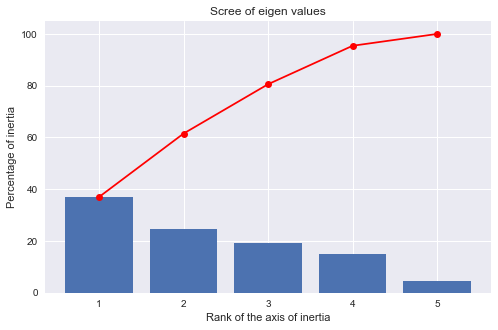

In [62]:
# Displaying the scree plot
display_scree_plot(pca)

Nous allons visualiser le cercle des corrélations des deux premières composantes.

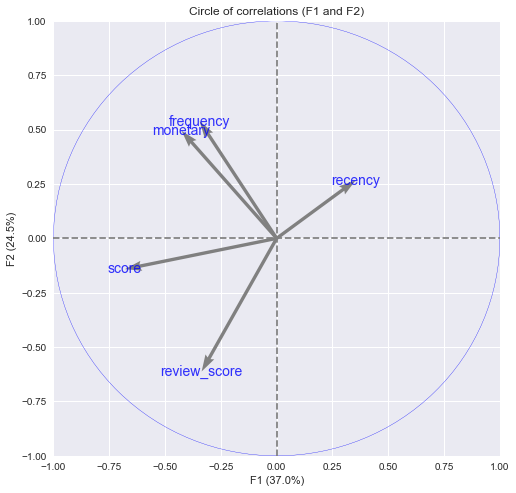

In [63]:
# Displaying the correlations circle of the first two components
pcs = pca.components_

# Displaying the correlations circle of the first two components
display_circles(pcs,
                2,
                pca,
                [(0, 1), (2, 3), (4, 5)],
                labels=np.array(pca_var))

Nous visualisons ici la projection des variables sur le cercle des corrélations.
- En analysant les axes principaux d'inerties F1 et F2, les variables les plus corrélées à F1 sont :
  - score ;
  - recency.


- Les variables les plus corrélées à F2 sont :
  - frequency ;
  - monetary ;
  - review_score.

Nous allons maintenant créer un dataframe avec les composantes principales comme variables.

In [64]:
# Creating the dataframe with the principal components as features
reduced_data_df = pd.DataFrame(
    reduced_data,
    index=pca_df.index,
    columns=["F"+str(i+1) for i in range(N_COMP)])
print(reduced_data_df.shape)
reduced_data_df.head()

(96096, 5)


,F1,F2,F3,F4,F5
0,-4.587910,3.985872,1.455322,3.157783,-1.347923
1,-2.980223,4.353121,-0.090912,1.964544,-1.053821
2,-5.678395,2.433342,-0.300816,2.306425,0.163858
3,-5.727751,2.650336,-0.544410,2.098954,0.132426
4,-3.935563,3.068243,-1.039132,2.297107,-1.104828


# 4. Export des jeux de données

In [65]:
# 4. Export of datasets
customers_df.to_csv('customers_df.csv', index=False)
stability_df.to_csv('stability_df.csv', index=False)